In [2]:
import dask.dataframe as dd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# ------------------------
# 1. Read the Data with Dask
# ------------------------
# Replace 'large_dataset.csv' with your CSV file.
# Dask will read the file in parallel.
data = pd.read_csv('Hospital_Inpatient_Discharges_2022.csv')

In [3]:
data.shape

(2103433, 33)

In [4]:
data.columns

Index(['Hospital Service Area', 'Hospital County',
       'Operating Certificate Number', 'Permanent Facility Id',
       'Facility Name', 'Age Group', 'Zip Code - 3 digits', 'Gender', 'Race',
       'Ethnicity', 'Length of Stay', 'Type of Admission',
       'Patient Disposition', 'Discharge Year', 'CCSR Diagnosis Code',
       'CCSR Diagnosis Description', 'CCSR Procedure Code',
       'CCSR Procedure Description', 'APR DRG Code', 'APR DRG Description',
       'APR MDC Code', 'APR MDC Description', 'APR Severity of Illness Code',
       'APR Severity of Illness Description', 'APR Risk of Mortality',
       'APR Medical Surgical Description', 'Payment Typology 1',
       'Payment Typology 2', 'Payment Typology 3', 'Birth Weight',
       'Emergency Department Indicator', 'Total Charges', 'Total Costs'],
      dtype='object')

In [5]:
data.describe()

,Operating Certificate Number,Permanent Facility Id,Discharge Year,APR DRG Code,APR MDC Code,APR Severity of Illness Code
count,2.097472e+06,2.098043e+06,2103433.0,2.103433e+06,2.103433e+06,2.103433e+06
mean,5.038452e+06,1.042746e+03,2022.0,4.133186e+02,1.029289e+01,2.146218e+00
std,2.247117e+06,7.311661e+02,0.0,2.437523e+02,5.967575e+00,9.624234e-01
min,1.010000e+05,1.000000e+00,2022.0,1.000000e+00,0.000000e+00,0.000000e+00
25%,2.952005e+06,5.410000e+02,2022.0,1.940000e+02,5.000000e+00,1.000000e+00
50%,5.907002e+06,1.072000e+03,2022.0,3.830000e+02,9.000000e+00,2.000000e+00
75%,7.002024e+06,1.453000e+03,2022.0,6.400000e+02,1.500000e+01,3.000000e+00
max,7.004010e+06,1.035500e+04,2022.0,9.560000e+02,2.500000e+01,4.000000e+00


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2103433 entries, 0 to 2103432
Data columns (total 33 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   Hospital Service Area                object 
 1   Hospital County                      object 
 2   Operating Certificate Number         float64
 3   Permanent Facility Id                float64
 4   Facility Name                        object 
 5   Age Group                            object 
 6   Zip Code - 3 digits                  object 
 7   Gender                               object 
 8   Race                                 object 
 9   Ethnicity                            object 
 10  Length of Stay                       object 
 11  Type of Admission                    object 
 12  Patient Disposition                  object 
 13  Discharge Year                       int64  
 14  CCSR Diagnosis Code                  object 
 15  CCSR Diagnosis Description      

In [7]:
data['Type of Admission'].value_counts()

Type of Admission
Emergency        1394328
Elective          356005
Newborn           198913
Urgent            145107
Trauma              7312
Not Available       1768
Name: count, dtype: int64

In [8]:
data['Permanent Facility Id'].value_counts()

Permanent Facility Id
1456.0     50110
541.0      48720
1464.0     44167
1458.0     43877
1463.0     43482
           ...  
968.0         82
817.0         45
37.0           2
10139.0        2
2.0            2
Name: count, Length: 206, dtype: int64

In [9]:
data.isnull().sum()

Hospital Service Area                     5390
Hospital County                           5390
Operating Certificate Number              5961
Permanent Facility Id                     5390
Facility Name                                0
Age Group                                    0
Zip Code - 3 digits                      41227
Gender                                       0
Race                                         0
Ethnicity                                    0
Length of Stay                               0
Type of Admission                            0
Patient Disposition                          0
Discharge Year                               0
CCSR Diagnosis Code                          0
CCSR Diagnosis Description                   0
CCSR Procedure Code                     582815
CCSR Procedure Description              582815
APR DRG Code                                 0
APR DRG Description                          0
APR MDC Code                                 0
APR MDC Descr

CLEANING

In [10]:
import pandas as pd

# Example columns to convert
columns_to_convert = [
    "Operating Certificate Number",
    "Discharge Year",
    "Zip Code - 3 digits",
    "Total Charges",
    "Total Costs"
]

# Convert each column to numeric
for col in columns_to_convert:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Verify
print(data.info())
print(data[columns_to_convert].describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2103433 entries, 0 to 2103432
Data columns (total 33 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   Hospital Service Area                object 
 1   Hospital County                      object 
 2   Operating Certificate Number         float64
 3   Permanent Facility Id                float64
 4   Facility Name                        object 
 5   Age Group                            object 
 6   Zip Code - 3 digits                  float64
 7   Gender                               object 
 8   Race                                 object 
 9   Ethnicity                            object 
 10  Length of Stay                       object 
 11  Type of Admission                    object 
 12  Patient Disposition                  object 
 13  Discharge Year                       int64  
 14  CCSR Diagnosis Code                  object 
 15  CCSR Diagnosis Description      

In [11]:
len(data['Hospital County'].unique())

58

In [12]:
len(data)

2103433

DATA CLIPPING

In [13]:
mask = pd.to_numeric(data['Length of Stay'], errors='coerce') < 10
# filter using that mask
data = data.loc[mask]

In [14]:
len(data)

1791103

In [15]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Set a clean Seaborn style (optional)
# sns.set_theme(style="whitegrid")

# # Create a histogram that plots "Length of Stay" vs. count (frequency)
# plt.figure(figsize=(10, 6))
# sns.histplot(data=data, x='Length of Stay', bins=100, color='skyblue', edgecolor='black')
# plt.xlabel('Length of Stay (days)', fontsize=12)
# plt.ylabel('Count of Patients', fontsize=12)
# plt.title('Distribution of Length of Stay', fontsize=14)
# plt.tight_layout()
# plt.show()


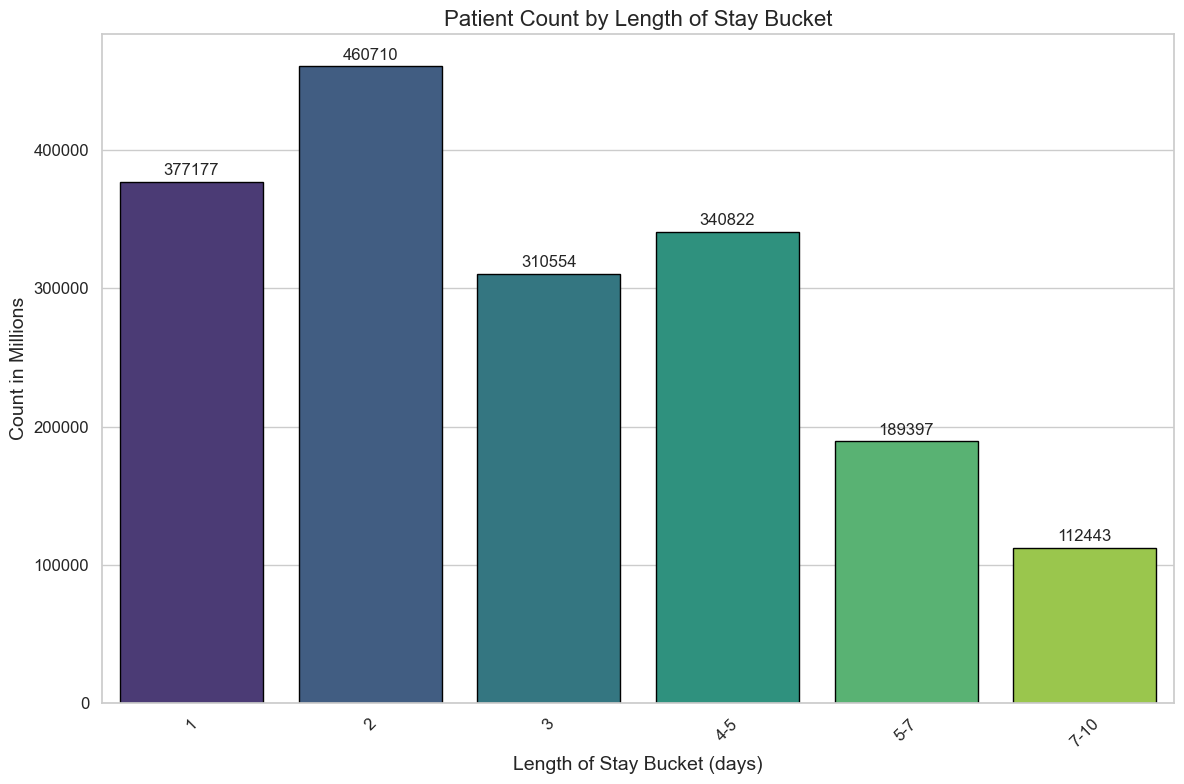

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Convert 'Length of Stay' column to numeric (if not already numeric)
data['Length of Stay'] = pd.to_numeric(data['Length of Stay'], errors='coerce')

# Optionally drop rows with NaN values in 'Length of Stay'
data = data.dropna(subset=['Length of Stay'])

# Define bucket edges, using np.inf to capture all values 70 and above.
bins = [0.5, 1.5, 2.5, 3.5, 5.5, 7.5, 10.5]
labels = ["1", "2", "3", "4-5", "5-7", "7-10"]

# Create a new column that groups 'Length of Stay' into the specified buckets.
data['LOS_bucket'] = pd.cut(data['Length of Stay'], bins=bins, labels=labels, right=False, include_lowest=True)

# Set a clean seaborn style.
sns.set_theme(style="whitegrid")

# Create the count plot with enhanced visual properties.
plt.figure(figsize=(12, 8))
ax = sns.countplot(data=data, x='LOS_bucket', order=labels, palette='viridis', edgecolor='black')

# Add annotations: display the count above each bar.
for p in ax.patches:
    count = int(p.get_height())
    ax.annotate(count, (p.get_x() + p.get_width() / 2., count),
                ha='center', va='center', xytext=(0, 8),
                textcoords='offset points', fontsize=12)

# Label adjustments.
plt.xlabel('Length of Stay Bucket (days)', fontsize=14)
plt.ylabel('Count in Millions', fontsize=14)
plt.title('Patient Count by Length of Stay Bucket', fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

In [17]:
#ccsr code transformation
data['Diagnosis_Code'] = data['CCSR Diagnosis Code'].str.slice(0, 3)

In [18]:
data['Diagnosis_Code'].unique()

array(['INF', 'SKN', 'PRG', 'MBD', 'RSP', 'EYE', 'GEN', 'INJ', 'NVS',
       'CIR', 'DIG', 'PNL', 'MUS', 'BLD', 'END', 'SYM', 'FAC', 'NEO',
       'EAR', 'MAL', 'XXX'], dtype=object)

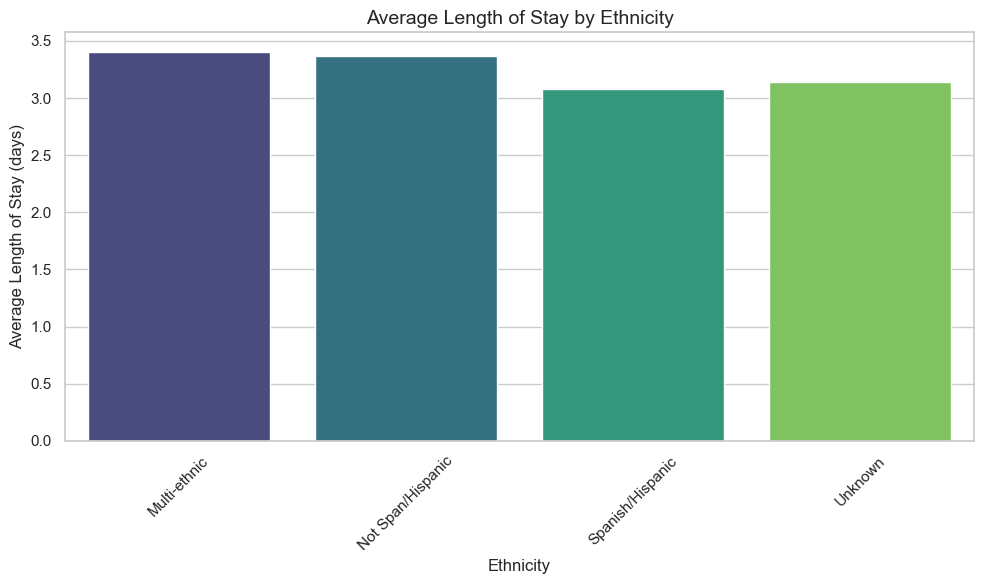

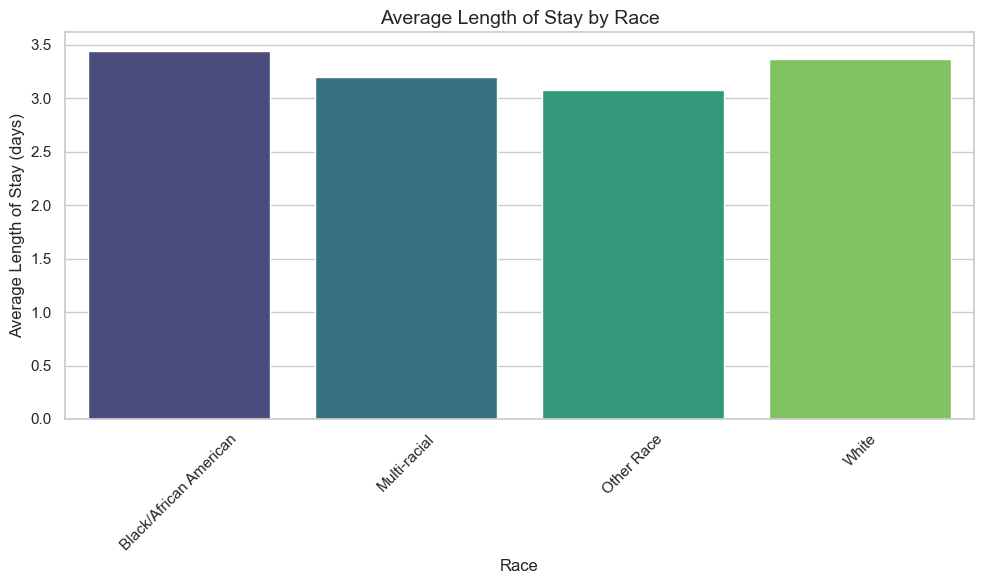

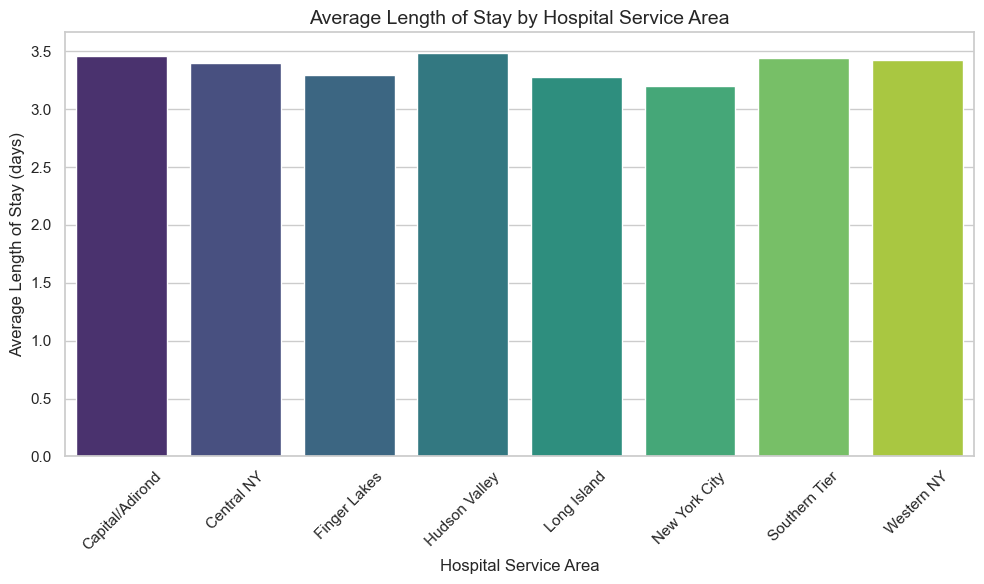

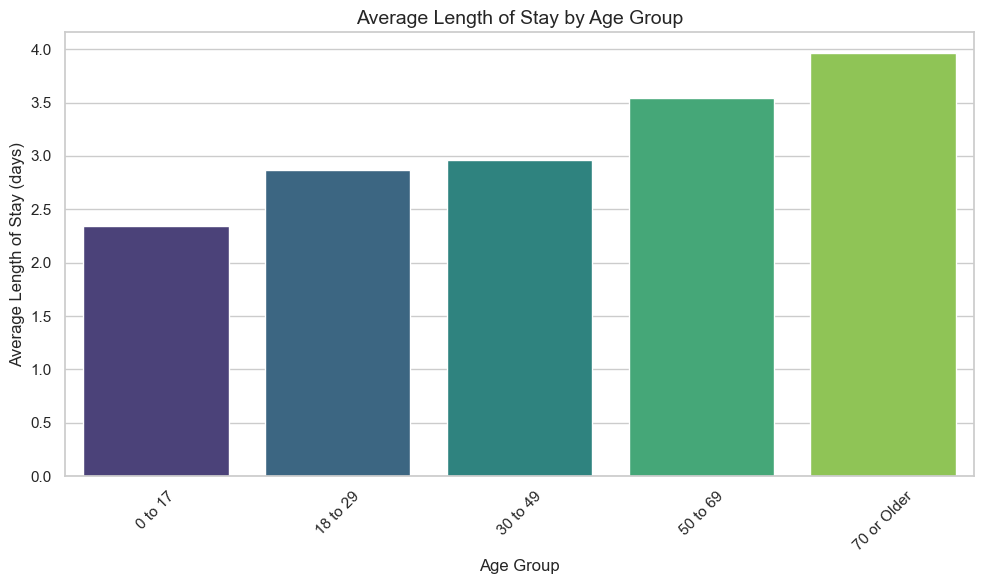

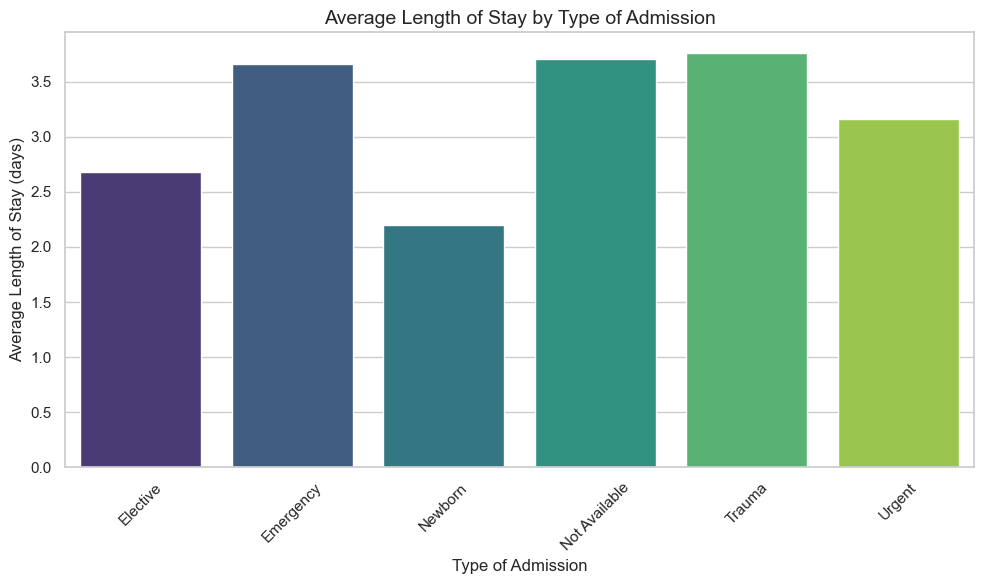

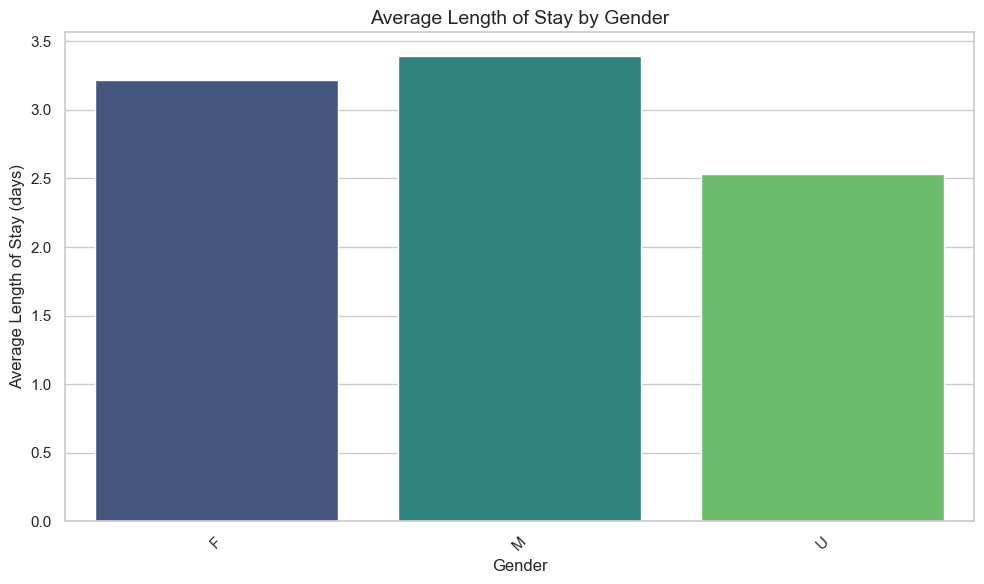

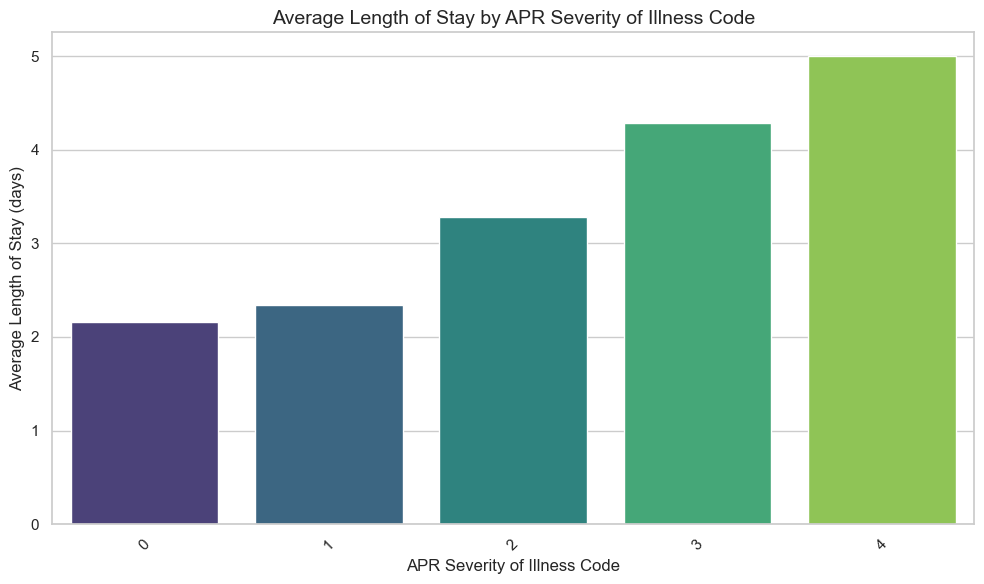

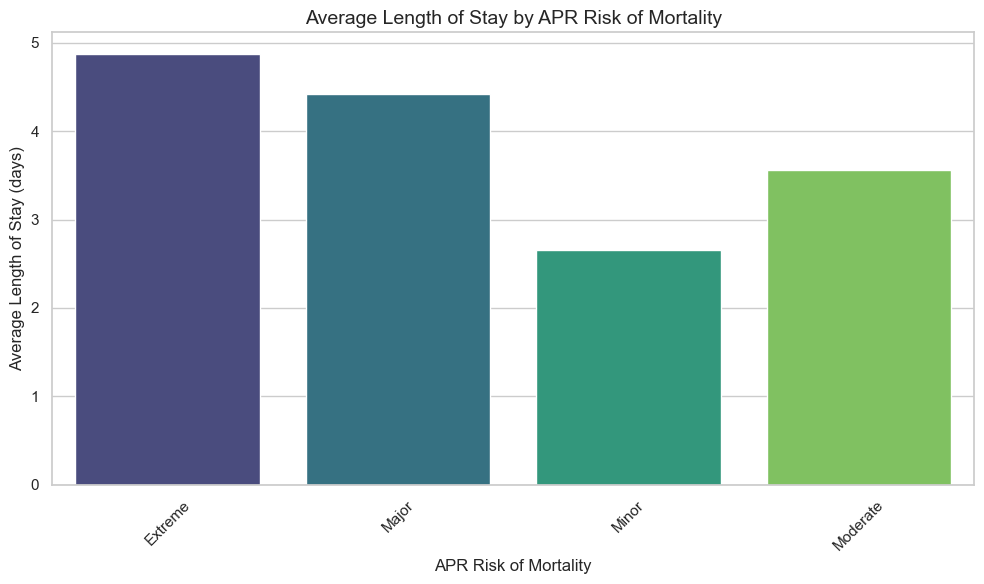

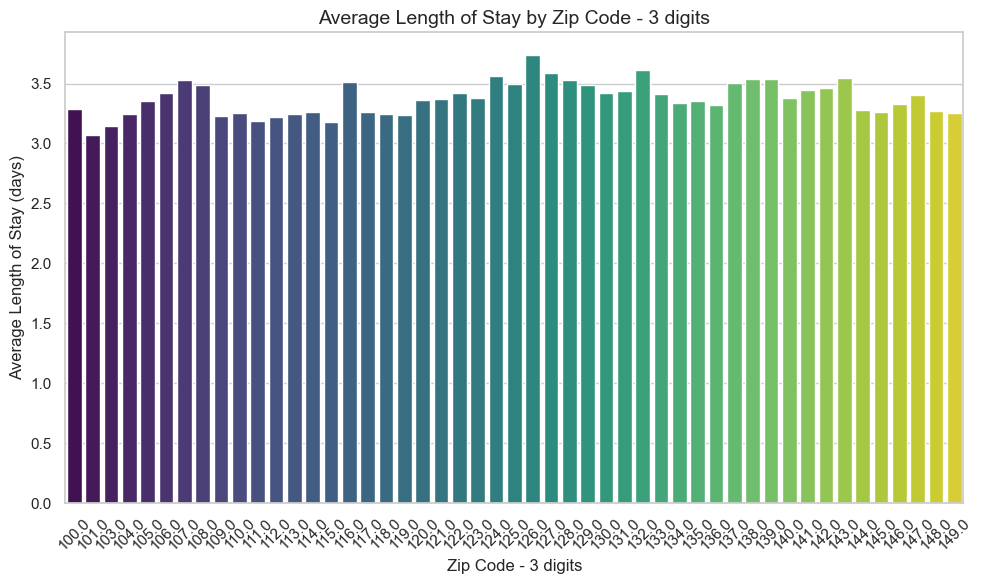

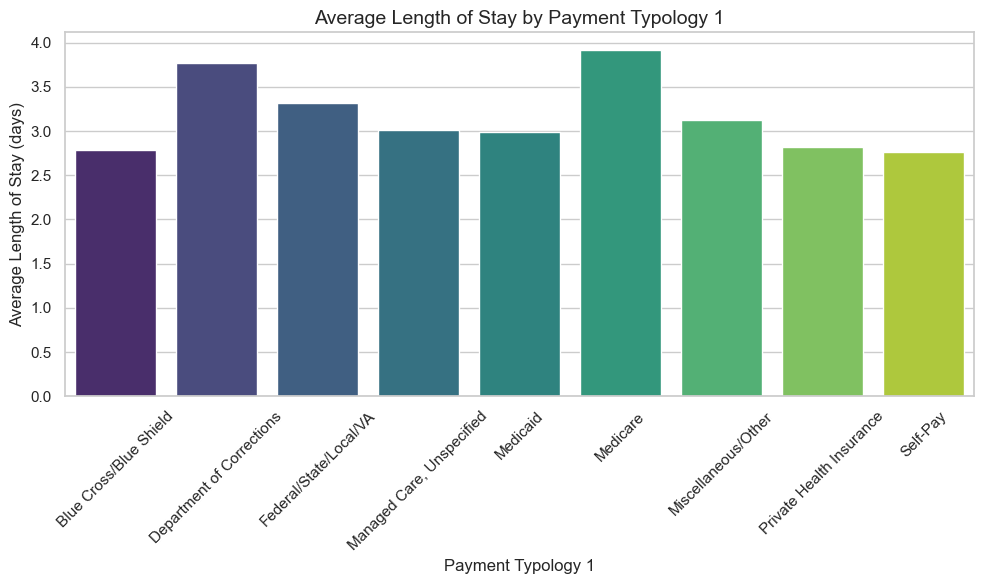

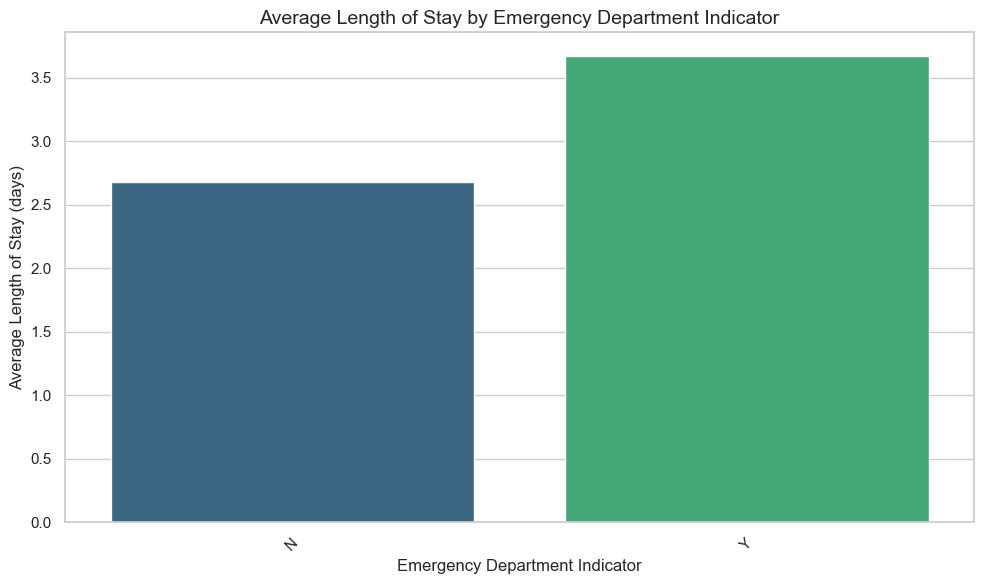

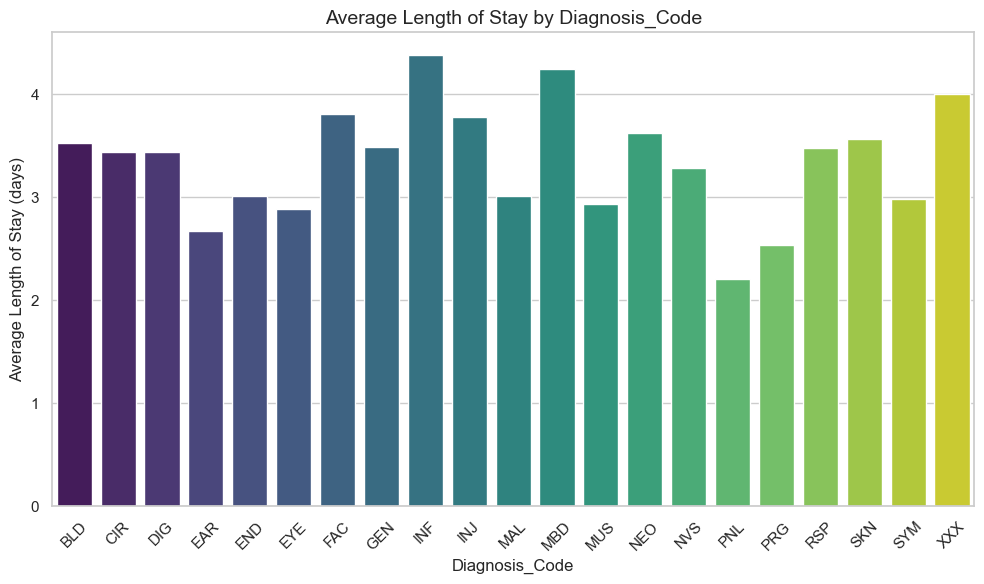

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of features to analyze against 'Length of Stay'
features = ['Ethnicity', 'Race', 'Hospital Service Area', 'Age Group', 'Type of Admission', 'Gender',
            'APR Severity of Illness Code', 'APR Risk of Mortality', 'Zip Code - 3 digits',
            'Payment Typology 1', 'Emergency Department Indicator', 'Diagnosis_Code']

# Loop over each feature and create a bar plot for average Length of Stay per category.
for feature in features:
    # Group the data by the current feature and compute the average Length of Stay
    avg_df = data.groupby(feature)['Length of Stay'].mean().reset_index()
    
    # Create the plot
    plt.figure(figsize=(10, 6))
    sns.barplot(data=avg_df, x=feature, y='Length of Stay', palette='viridis')
    plt.title(f'Average Length of Stay by {feature}', fontsize=14)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Average Length of Stay (days)', fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

***INSIGHTS***

***NOT MUCH VARIANCE FOR ETHNICITY, RACE, ZIP CODE***


***VARIANCE FOR EMERGENCY DEPARTMENT, AREA, GENDER, ILLNESS SEVERITY CODE, TYPE OF ADMISSION, AGE GROUP***




Top correlated features with Length of Stay: ['APR Severity of Illness Code', 'Total Charges', 'Total Costs', 'Permanent Facility Id', 'Operating Certificate Number', 'Zip Code - 3 digits']


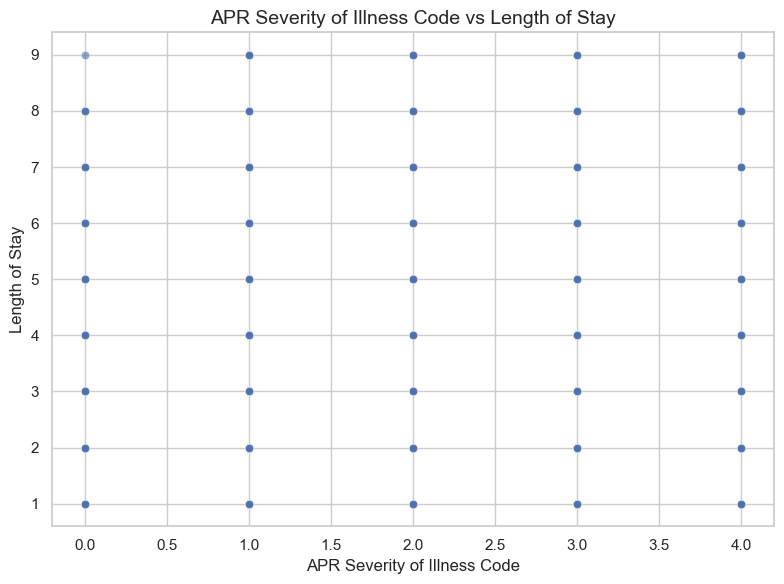

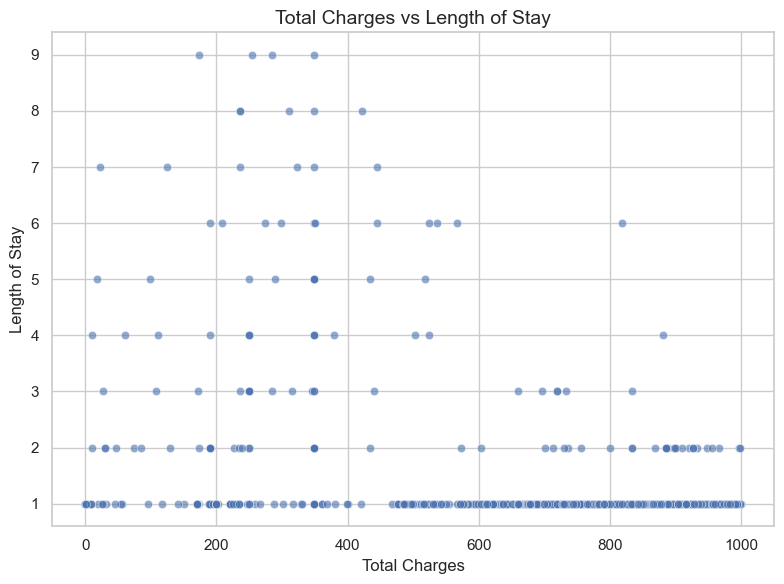

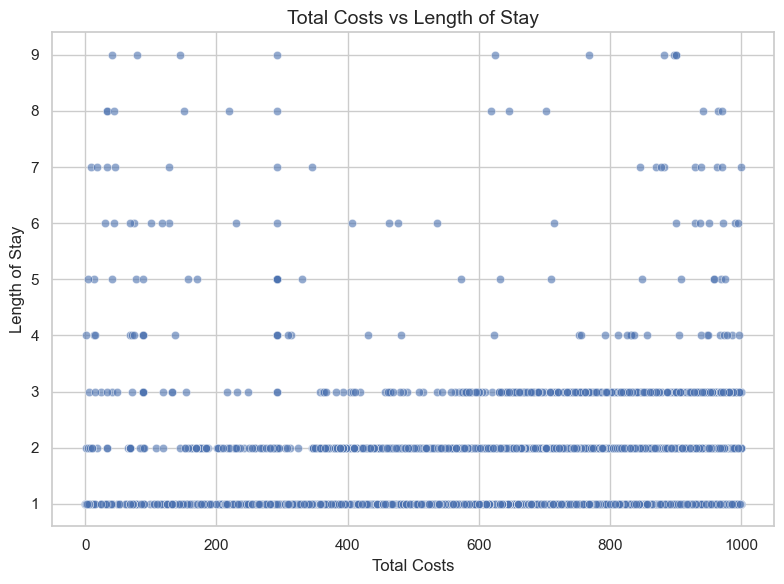

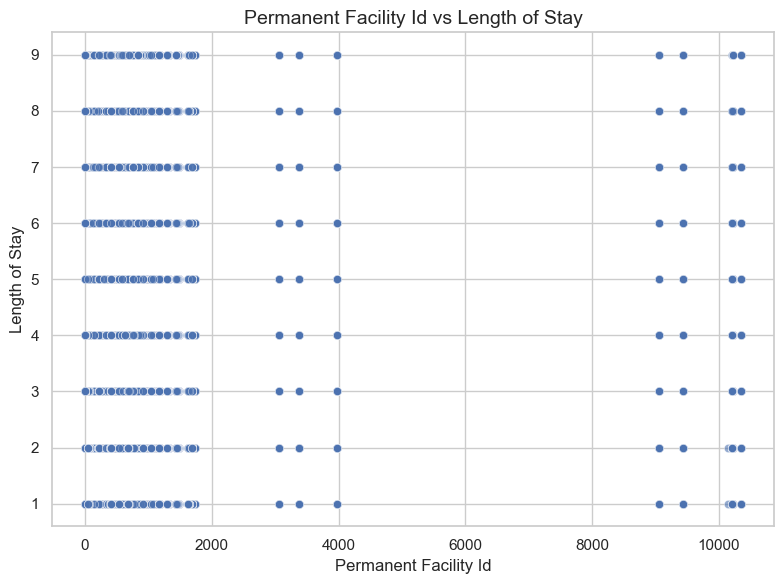

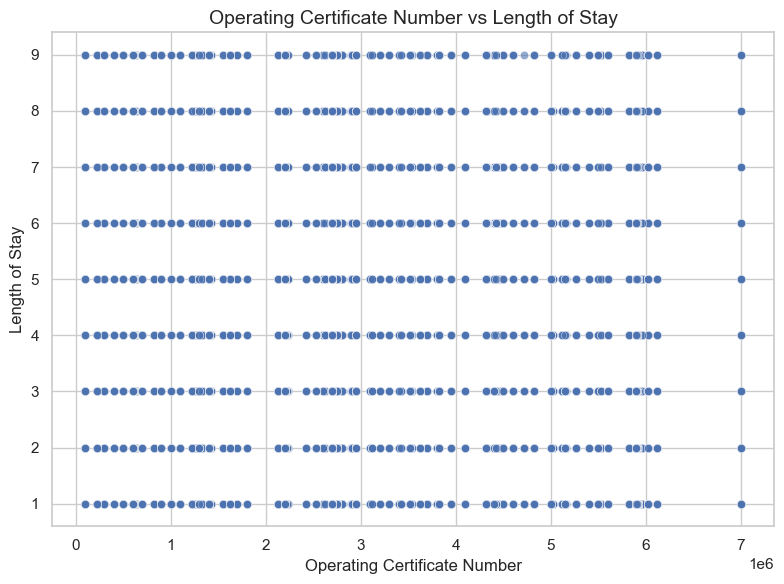

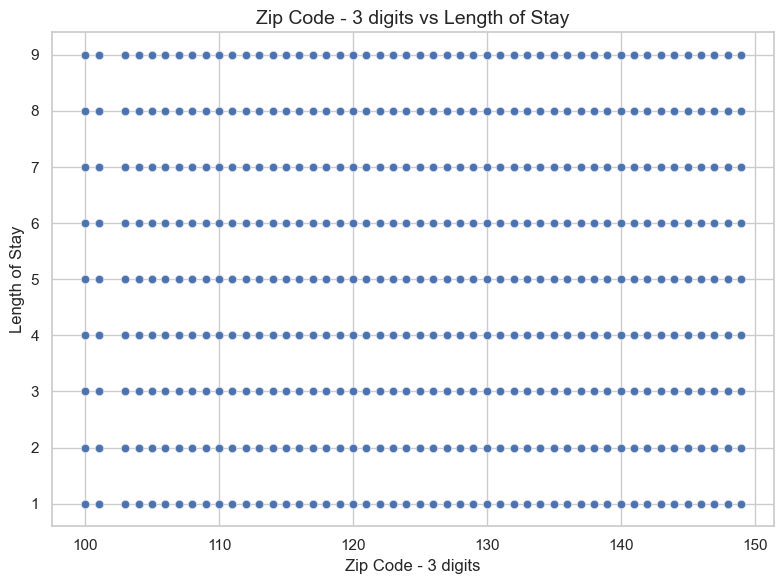

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assume your cleaned, encoded DataFrame is named 'data'
target = 'Length of Stay'

# Select only numeric features (excluding the target)
numeric_features = [col for col in data.select_dtypes(include=['float64', 'int64']).columns if col != target]

# Compute correlations with the target
corr = data[numeric_features + [target]].corr()[target].abs().sort_values(ascending=False)

# Select the top 5 features (excluding Length of Stay itself)
top_features = corr.index[1:7]  
print("Top correlated features with Length of Stay:", list(top_features))

# Plot scatter plots for the top correlated features vs. Length of Stay
for feature in top_features:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=data, x=feature, y=target, alpha=0.6)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel(target, fontsize=12)
    plt.title(f'{feature} vs {target}', fontsize=14)
    plt.tight_layout()
    plt.show()


LOS increases with severity of illness. 

In [21]:
import pandas as pd

# Assuming 'data' is your DataFrame
# Select numeric columns
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns

# Print the variance for each numeric column
variance_dict = data[numeric_cols].var().to_dict()
print("Variance of Numeric Columns:")
print(variance_dict)

Variance of Numeric Columns:
{'Operating Certificate Number': 5048074913745.594, 'Permanent Facility Id': 525481.4083097669, 'Zip Code - 3 digits': 181.99741894836214, 'Length of Stay': 4.587340972905763, 'Discharge Year': 0.0, 'APR DRG Code': 54947.45185523285, 'APR MDC Code': 32.88386885426147, 'APR Severity of Illness Code': 0.8073390902700444, 'Total Charges': 75355.2845272263, 'Total Costs': 34857.85370406278}


In [22]:
# Calculate the fraction of missing values per column.
missing_fraction = data.isnull().mean()

# Identify columns where at least 85% of the values are missing.
cols_to_drop = missing_fraction[missing_fraction >= 0.85].index.tolist()

print("Columns to drop (>= 85% missing):", cols_to_drop)

# Drop these columns from the DataFrame.
data_cleaned = data.drop(columns=cols_to_drop)

# Display the shape before and after dropping to verify.
print("Original DataFrame shape:", data.shape)
print("Cleaned DataFrame shape:", data_cleaned.shape)

Columns to drop (>= 85% missing): ['Payment Typology 3', 'Birth Weight', 'Total Charges', 'Total Costs']
Original DataFrame shape: (1791103, 35)
Cleaned DataFrame shape: (1791103, 31)


In [23]:
import pandas as pd

threshold = 0.8  # You can change this to 0.90 if desired.

low_variance_cols = []

# Loop over each column in the DataFrame.
for col in data.columns:
    # Calculate the percentage of the most frequent value.
    most_common_percentage = data[col].value_counts(normalize=True, dropna=False).iloc[0]
    
    # If the most common value appears in at least the threshold percentage of rows, mark the column.
    if most_common_percentage >= threshold:
        low_variance_cols.append(col)

print("Columns with low variance (>= {}% identical values):".format(threshold * 100))
print(low_variance_cols)

# Optionally, drop these columns from your DataFrame.
data_cleaned = data.drop(columns=low_variance_cols)

# # Check shape of data before and after dropping low variance columns
print("Original DataFrame shape:", data.shape)
print("Cleaned DataFrame shape:", data_cleaned.shape)


Columns with low variance (>= 80.0% identical values):
['Discharge Year', 'Payment Typology 3', 'Birth Weight', 'Total Charges', 'Total Costs']
Original DataFrame shape: (1791103, 35)
Cleaned DataFrame shape: (1791103, 30)


In [24]:
# Drop rows where 'Hospital Service Area' is NaN
data_cleaned = data_cleaned.dropna(subset=['Hospital Service Area','APR Risk of Mortality'])

# Verify the change by comparing shape before and after.
print("Original DataFrame shape:", data.shape)
print("Cleaned DataFrame shape:", data_cleaned.shape)

Original DataFrame shape: (1791103, 35)
Cleaned DataFrame shape: (1785494, 30)


In [25]:
data_cleaned.isnull().sum()

Hospital Service Area                       0
Hospital County                             0
Operating Certificate Number              533
Permanent Facility Id                       0
Facility Name                               0
Age Group                                   0
Zip Code - 3 digits                     82031
Gender                                      0
Race                                        0
Ethnicity                                   0
Length of Stay                              0
Type of Admission                           0
Patient Disposition                         0
CCSR Diagnosis Code                         0
CCSR Diagnosis Description                  0
CCSR Procedure Code                    526800
CCSR Procedure Description             526800
APR DRG Code                                0
APR DRG Description                         0
APR MDC Code                                0
APR MDC Description                         0
APR Severity of Illness Code      

In [26]:
columns_to_drop = ['Operating Certificate Number','Zip Code - 3 digits','CCSR Procedure Code','CCSR Procedure Description',
                   'APR Severity of Illness Description','Payment Typology 2']

data_cleaned = data_cleaned.drop(columns=columns_to_drop)

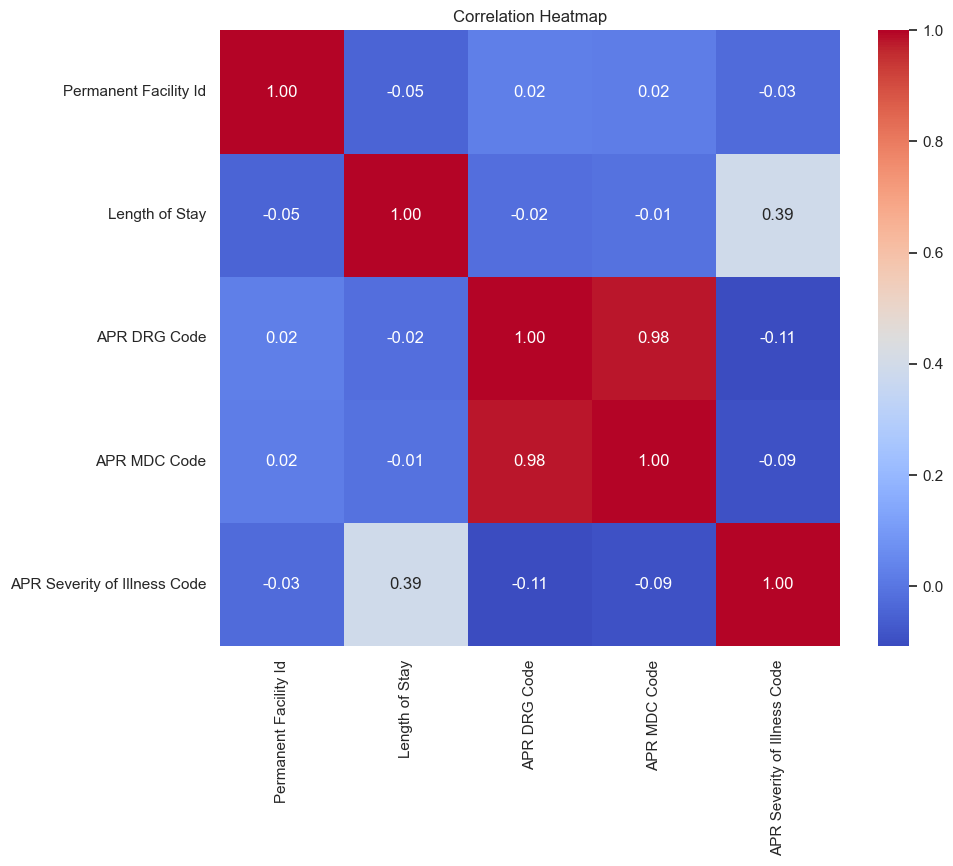

In [27]:
plt.figure(figsize=(10, 8))
numeric_columns = data_cleaned.select_dtypes(include=['int64', 'float64'])
sns.heatmap(numeric_columns.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

#Insight

APR Severity highly correlated with length of stay

In [28]:
data_cleaned.columns

Index(['Hospital Service Area', 'Hospital County', 'Permanent Facility Id',
       'Facility Name', 'Age Group', 'Gender', 'Race', 'Ethnicity',
       'Length of Stay', 'Type of Admission', 'Patient Disposition',
       'CCSR Diagnosis Code', 'CCSR Diagnosis Description', 'APR DRG Code',
       'APR DRG Description', 'APR MDC Code', 'APR MDC Description',
       'APR Severity of Illness Code', 'APR Risk of Mortality',
       'APR Medical Surgical Description', 'Payment Typology 1',
       'Emergency Department Indicator', 'LOS_bucket', 'Diagnosis_Code'],
      dtype='object')

In [29]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1785494 entries, 0 to 2103432
Data columns (total 24 columns):
 #   Column                            Dtype   
---  ------                            -----   
 0   Hospital Service Area             object  
 1   Hospital County                   object  
 2   Permanent Facility Id             float64 
 3   Facility Name                     object  
 4   Age Group                         object  
 5   Gender                            object  
 6   Race                              object  
 7   Ethnicity                         object  
 8   Length of Stay                    int64   
 9   Type of Admission                 object  
 10  Patient Disposition               object  
 11  CCSR Diagnosis Code               object  
 12  CCSR Diagnosis Description        object  
 13  APR DRG Code                      int64   
 14  APR DRG Description               object  
 15  APR MDC Code                      int64   
 16  APR MDC Description    

Mapping  -  Emergency Department Indicator, APR Risk of Mortality  

In [30]:
data_cleaned['Hospital Service Area'].value_counts()

Hospital Service Area
New York City      806013
Long Island        296834
Hudson Valley      195526
Western NY         119813
Central NY         117319
Capital/Adirond    116078
Finger Lakes       111917
Southern Tier       21994
Name: count, dtype: int64

In [31]:
ed_mapping = {
    'Y': 1,
    'N': 0
}

# Map the Emergency Department Indicator values.
data_cleaned['Emergency Department Indicator'] = data['Emergency Department Indicator'].map(ed_mapping)

# Define the mapping for APR Risk of Mortality.
apr_risk_mapping = {
    'Minor': 1,
    'Moderate': 2,
    'Major': 3,
    'Extreme': 4
}

# Map the APR Risk of Mortality values.
data_cleaned['APR Risk of Mortality'] = data['APR Risk of Mortality'].map(apr_risk_mapping)


race_mapping = {
    'White': 1,
    'Black/African American': 2,
    'Other': 3,
    'Multi-racial': 4
}

data_cleaned['Race'] = data_cleaned['Race'].map(race_mapping)

ethnicity_mapping = {
    'Not Span/Hispanic': 1,
    'Spanish/Hispanic': 2,
    'Unknown': 3,
    'Multi-ethnic': 4
}

# data_cleaned['Ethnicity'] = data_cleaned['Ethnicity'].map(ethnicity_mapping)
hsa_mapping = {
    'New York City': 1,
    'Long Island': 2,
    'Hudson Valley': 3,
    'Western NY': 4,
    'Capital/Adirondack': 5,
    'Central NY': 6,
    'Finger Lakes': 7,
    'Southern Tier': 8
}

data_cleaned['Hospital Service Area'] = data_cleaned['Hospital Service Area'].map(hsa_mapping)



# Check the transformed data.
print(data[['Emergency Department Indicator', 'APR Risk of Mortality']].head())

  Emergency Department Indicator APR Risk of Mortality
0                              Y                 Major
1                              Y                 Minor
2                              N                 Minor
3                              Y                 Minor
4                              Y              Moderate


In [32]:
data_cleaned['Payment Typology 1'].unique()

array(['Medicaid', 'Medicare', 'Blue Cross/Blue Shield',
       'Private Health Insurance', 'Self-Pay',
       'Managed Care, Unspecified', 'Miscellaneous/Other',
       'Department of Corrections', 'Federal/State/Local/VA'],
      dtype=object)

In [33]:
data_cleaned.columns

Index(['Hospital Service Area', 'Hospital County', 'Permanent Facility Id',
       'Facility Name', 'Age Group', 'Gender', 'Race', 'Ethnicity',
       'Length of Stay', 'Type of Admission', 'Patient Disposition',
       'CCSR Diagnosis Code', 'CCSR Diagnosis Description', 'APR DRG Code',
       'APR DRG Description', 'APR MDC Code', 'APR MDC Description',
       'APR Severity of Illness Code', 'APR Risk of Mortality',
       'APR Medical Surgical Description', 'Payment Typology 1',
       'Emergency Department Indicator', 'LOS_bucket', 'Diagnosis_Code'],
      dtype='object')

In [34]:
columns_to_drop_for_corr = [ 
                            'Facility Name','Patient Disposition',  'CCSR Diagnosis Description',
                            'Patient Disposition','CCSR Diagnosis Description','APR DRG Description',
                            'APR MDC Description','APR Medical Surgical Description','Hospital County',
                            'CCSR Diagnosis Code', 'Race',
                            'LOS_bucket',
                            'Ethnicity'
                           ]

In [35]:
data_for_correlation = data_cleaned.drop(columns=columns_to_drop_for_corr)

In [36]:
data_for_correlation.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1785494 entries, 0 to 2103432
Data columns (total 13 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   Hospital Service Area           float64
 1   Permanent Facility Id           float64
 2   Age Group                       object 
 3   Gender                          object 
 4   Length of Stay                  int64  
 5   Type of Admission               object 
 6   APR DRG Code                    int64  
 7   APR MDC Code                    int64  
 8   APR Severity of Illness Code    int64  
 9   APR Risk of Mortality           float64
 10  Payment Typology 1              object 
 11  Emergency Department Indicator  int64  
 12  Diagnosis_Code                  object 
dtypes: float64(3), int64(5), object(5)
memory usage: 190.7+ MB


In [37]:
categorical_features = ['Gender', 'Type of Admission', 'Hospital Service Area',
                        'Age Group', 'APR Severity of Illness Code',
                       'APR Risk of Mortality','Payment Typology 1',
                       'Diagnosis_Code']

# One hot encode the categorical columns
data_encoded = pd.get_dummies(data_for_correlation, columns=categorical_features, drop_first=True)
#data_encoded = pd.get_dummies(data_for_correlation)

print("Data shape after one hot encoding:", data_encoded.shape)

Data shape after one hot encoding: (1785494, 56)


In [38]:
data_encoded.isnull().sum()

Permanent Facility Id                           0
Length of Stay                                  0
APR DRG Code                                    0
APR MDC Code                                    0
Emergency Department Indicator                  0
Gender_M                                        0
Gender_U                                        0
Type of Admission_Emergency                     0
Type of Admission_Newborn                       0
Type of Admission_Not Available                 0
Type of Admission_Trauma                        0
Type of Admission_Urgent                        0
Hospital Service Area_2.0                       0
Hospital Service Area_3.0                       0
Hospital Service Area_4.0                       0
Hospital Service Area_6.0                       0
Hospital Service Area_7.0                       0
Hospital Service Area_8.0                       0
Age Group_18 to 29                              0
Age Group_30 to 49                              0


In [39]:
# data_encoded['Permanent Facility Id'] = data_encoded['Permanent Facility Id'].astype('category')
# data_encoded['APR DRG Code'] = data_encoded['APR DRG Code'].astype('category')
# data_encoded['APR MDC Code'] = data_encoded['APR MDC Code'].astype('category')
# data_encoded['APR Severity of Illness Code'] = data_encoded['APR Severity of Illness Code'].astype('category')

In [40]:
# f, ax = plt.subplots(figsize=(11, 9))
# corr = data_encoded.corr()
# ax = sns.heatmap(
#     corr, 
#     vmin=-1, vmax=1, center=0,
#     cmap=sns.diverging_palette(20, 220, n=200),
#     square=True
# )
# ax.set_xticklabels(
#     ax.get_xticklabels(),
#     rotation=45,
#     horizontalalignment='right'
# );

In [41]:
#Dont run
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns

# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# ------------------------
# 1. Define Features (X) and Target (y)
# ------------------------
# Assume 'data_encoded' is your processed DataFrame.
# Ensure non-informative columns like 'LOS_bucket' or any ID columns are dropped.
X = data_encoded.drop(columns=['Length of Stay', 'LOS_bucket', 'Permanent Facility Id'], errors='ignore')
y = data_encoded['Length of Stay']

# ------------------------
# 2. Split the Data
# ------------------------
# X_train, X_test, y_train, y_test = train_test_split(
#     X, 
#     y, 
#     test_size=0.2,    # Hold out 20% of data for testing.
#     random_state=42   # For reproducibility.
# )

# # ------------------------
# # 3. Scale the Features
# # ------------------------
# scaler = StandardScaler()

# # Fit the scaler on the training data, then transform both training and test data.
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# # ------------------------
# # 4. Train the Linear Regression Model Using Scaled Features
# # ------------------------
# lr_model = LinearRegression()
# lr_model.fit(X_train_scaled, y_train)

# # ------------------------
# # 5. Make Predictions
# # ------------------------
# y_pred = lr_model.predict(X_test_scaled)

# # ------------------------
# # 6. Evaluate the Model
# # ------------------------
# mae = mean_absolute_error(y_test, y_pred)
# mse = mean_squared_error(y_test, y_pred)
# rmse = np.sqrt(mse)
# r2 = r2_score(y_test, y_pred)

# print("Linear Regression Performance (With Scaling):")
# print(f"  MAE  = {mae:.2f}")
# print(f"  RMSE = {rmse:.2f}")
# print(f"  R2   = {r2:.2f}")

# # ------------------------
# # 7. Plot Actual vs Predicted
# # ------------------------
# plt.figure(figsize=(10, 6))
# plt.scatter(y_test, y_pred, alpha=0.5, color='blue', label='Predictions')
# plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Ideal Fit')
# plt.xlabel('Actual Length of Stay')
# plt.ylabel('Predicted Length of Stay')
# plt.title('Actual vs Predicted Length of Stay (Scaled Features)')
# plt.legend()
# plt.tight_layout()
# plt.show()

# # ------------------------
# # 8. Plot the Residual Distribution
# # ------------------------
# residuals = y_test - y_pred
# plt.figure(figsize=(10, 6))
# sns.histplot(residuals, bins=50, kde=True, color='green')
# plt.xlabel('Residuals')
# plt.title('Residual Distribution')
# plt.tight_layout()
# plt.show()

Ridge Regression Performance:
  MAE  = 1.47
  RMSE = 1.90
  R2   = 0.21

Lasso Regression Performance:
  MAE  = 1.53
  RMSE = 1.94
  R2   = 0.18

Random Forest Regression Performance:
  MAE  = 1.38
  RMSE = 1.86
  R2   = 0.25



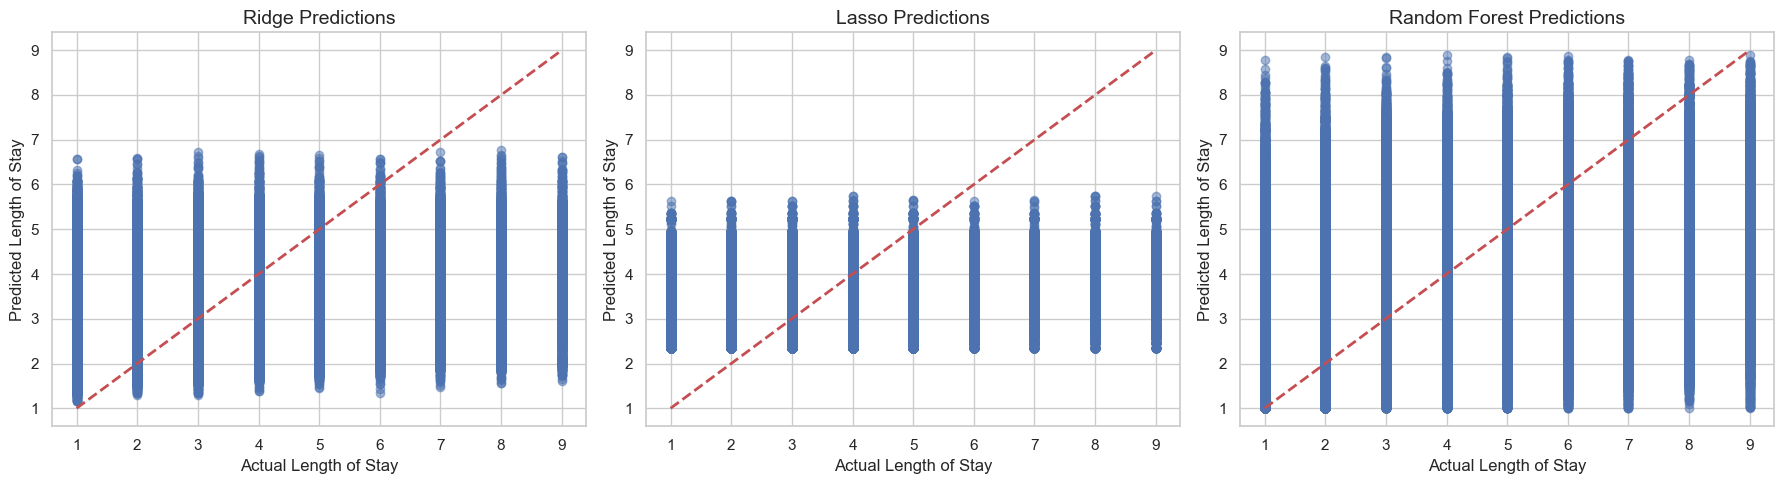

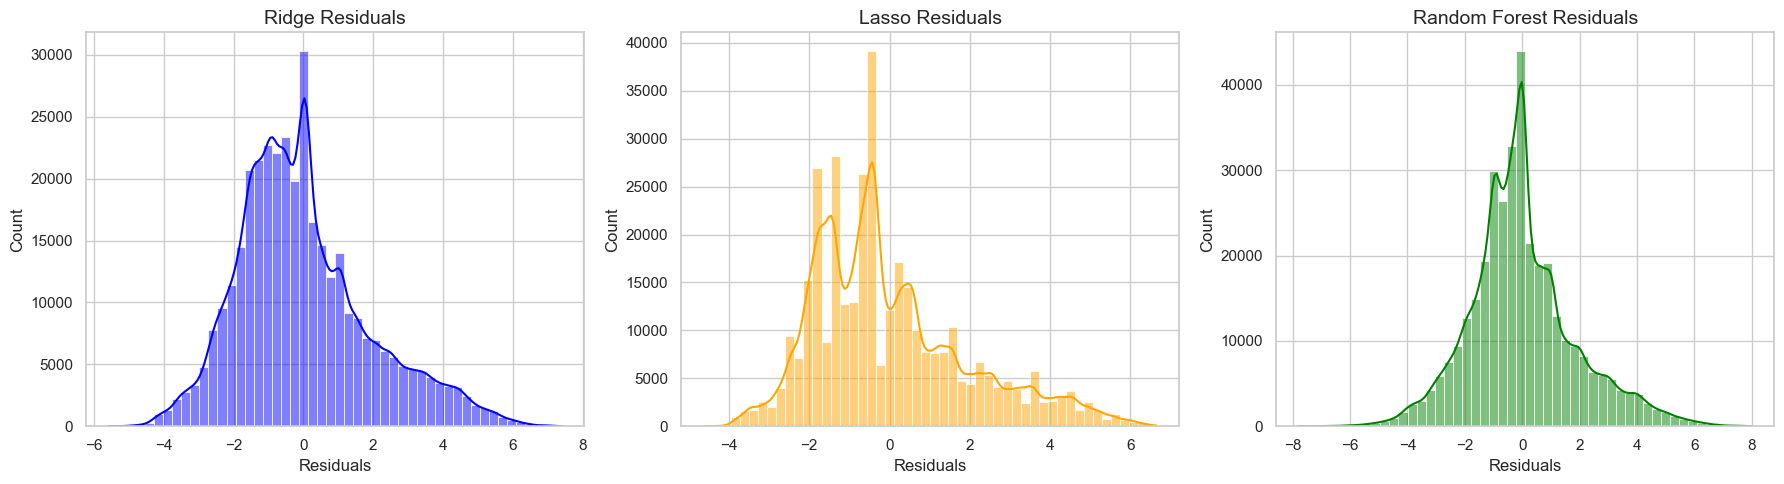

In [42]:
#NO NEED TO RUN
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# ------------------------
# 1. Define Features (X) and Target (y)
# ------------------------
# Assume 'data_encoded' is your processed DataFrame.
# Drop non-informative columns such as 'LOS_bucket' and 'Permanent Facility Id'
X = data_encoded.drop(columns=['Length of Stay', 'LOS_bucket', 'Permanent Facility Id'], errors='ignore')
y = data_encoded['Length of Stay']

# ------------------------
# 2. Split the Data
# ------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2,    # 20% of the data is held out for testing.
    random_state=42   # For reproducibility.
)

# ------------------------
# 3. Scale the Features for Ridge & Lasso
# ------------------------
scaler = StandardScaler()

# Scale features based on training set; use same scaling on test set.
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ------------------------
# 4. Train Models and Make Predictions
# ------------------------

# --- Ridge Regression ---
ridge_model = Ridge(alpha=1.0, random_state=42)
ridge_model.fit(X_train_scaled, y_train)
y_pred_ridge = ridge_model.predict(X_test_scaled)

# --- Lasso Regression ---
lasso_model = Lasso(alpha=0.1, random_state=42)
lasso_model.fit(X_train_scaled, y_train)
y_pred_lasso = lasso_model.predict(X_test_scaled)

# --- Random Forest Regression ---
# For random forest, scaling is not typically required, so we use original features.
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# ------------------------
# 5. Evaluate the Models
# ------------------------
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} Performance:")
    print(f"  MAE  = {mae:.2f}")
    print(f"  RMSE = {rmse:.2f}")
    print(f"  R2   = {r2:.2f}\n")
    return mae, rmse, r2

mae_ridge, rmse_ridge, r2_ridge = evaluate_model(y_test, y_pred_ridge, "Ridge Regression")
mae_lasso, rmse_lasso, r2_lasso = evaluate_model(y_test, y_pred_lasso, "Lasso Regression")
mae_rf, rmse_rf, r2_rf = evaluate_model(y_test, y_pred_rf, "Random Forest Regression")

# ------------------------
# 6. Plot Actual vs Predicted for Each Model
# ------------------------
models = ['Ridge', 'Lasso', 'Random Forest']
predictions = [y_pred_ridge, y_pred_lasso, y_pred_rf]

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for ax, model_name, y_pred_model in zip(axes, models, predictions):
    ax.scatter(y_test, y_pred_model, alpha=0.5)
    ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    ax.set_title(f"{model_name} Predictions", fontsize=14)
    ax.set_xlabel("Actual Length of Stay", fontsize=12)
    ax.set_ylabel("Predicted Length of Stay", fontsize=12)
plt.tight_layout()
plt.show()

# ------------------------
# 7. Plot Residual Distributions for Each Model
# ------------------------
residuals_ridge = y_test - y_pred_ridge
residuals_lasso = y_test - y_pred_lasso
residuals_rf = y_test - y_pred_rf

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(residuals_ridge, bins=50, kde=True, color='blue', ax=axes[0])
axes[0].set_title("Ridge Residuals", fontsize=14)
axes[0].set_xlabel("Residuals", fontsize=12)

sns.histplot(residuals_lasso, bins=50, kde=True, color='orange', ax=axes[1])
axes[1].set_title("Lasso Residuals", fontsize=14)
axes[1].set_xlabel("Residuals", fontsize=12)

sns.histplot(residuals_rf, bins=50, kde=True, color='green', ax=axes[2])
axes[2].set_title("Random Forest Residuals", fontsize=14)
axes[2].set_xlabel("Residuals", fontsize=12)

plt.tight_layout()
plt.show()

SPLIT 0-3 BUCKETS
TRY OUT 

DECISON TREES REGRESSOR, ENSEMBLE METHOD
CONVERTING INTO CLASSIFICATION PROBLEM

In [43]:
bins = [0.5, 2.5, 5.5, np.inf]
labels = ["1-2","3-5", "6+"]

# bins = [0.5, 1.5, 2.5 , 4.5 , np.inf]
# labels = ['1','2','3-4','5+']


# Create a new column 'LOS_class' based on the bins. 
# Setting right=False means intervals are [lower, upper)
data_encoded['LOS_class'] = pd.cut(data['Length of Stay'], bins=bins, labels=labels, right=False)

# Check the distribution of the classes:
print("Length of Stay Class Distribution:")
print(data_encoded['LOS_class'].value_counts())


# Create a new column 'LOS_class' based on the bins. 
# Setting right=False means intervals are [lower, upper)
data_encoded['LOS_class'] = pd.cut(data['Length of Stay'], bins=bins, labels=labels, right=False)

# Check the distribution of the classes:
print("Length of Stay Class Distribution:")
print(data_encoded['LOS_class'].value_counts())

Length of Stay Class Distribution:
LOS_class
1-2    833716
3-5    650250
6+     301528
Name: count, dtype: int64
Length of Stay Class Distribution:
LOS_class
1-2    833716
3-5    650250
6+     301528
Name: count, dtype: int64


Logistic Regression Performance:
Accuracy: 0.5060137384870862
              precision    recall  f1-score   support

         1-2       0.67      0.63      0.65    166743
         3-5       0.45      0.26      0.33    130050
          6+       0.33      0.69      0.45     60306

    accuracy                           0.51    357099
   macro avg       0.49      0.53      0.48    357099
weighted avg       0.53      0.51      0.50    357099

Decision Tree Performance:
Accuracy: 0.530936799038922
              precision    recall  f1-score   support

         1-2       0.68      0.64      0.66    166743
         3-5       0.47      0.42      0.44    130050
          6+       0.35      0.49      0.41     60306

    accuracy                           0.53    357099
   macro avg       0.50      0.51      0.50    357099
weighted avg       0.54      0.53      0.54    357099



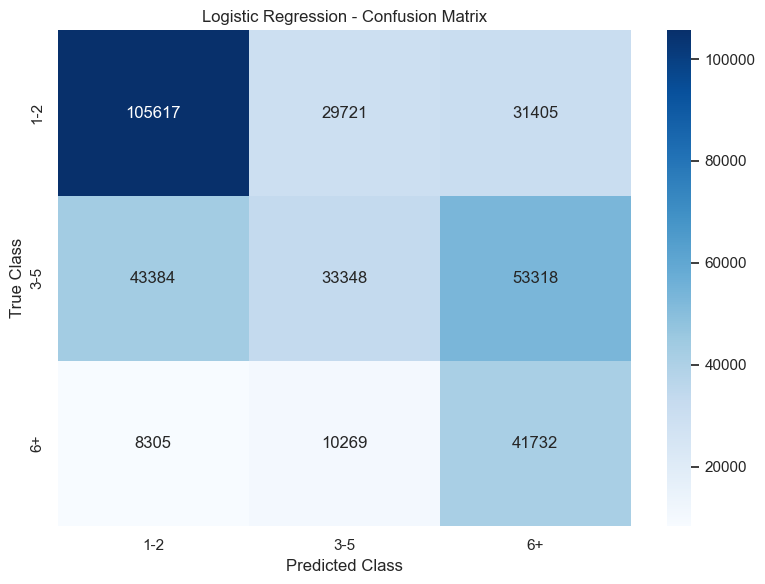

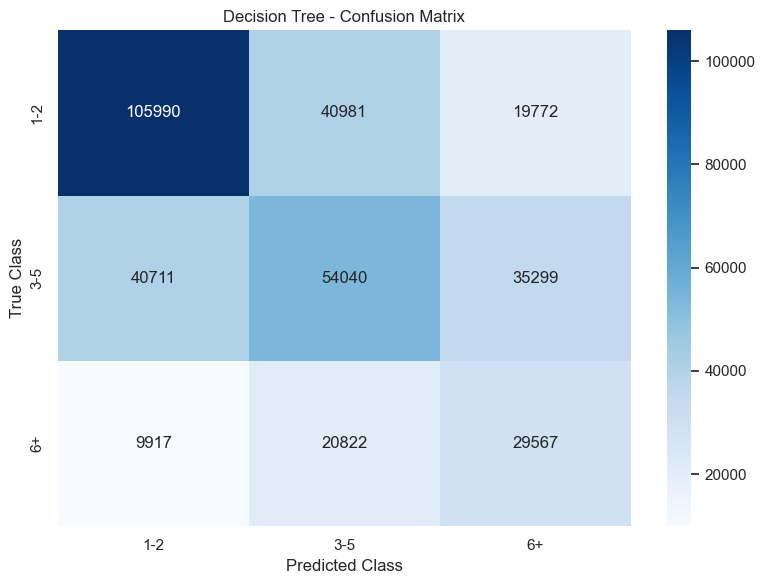

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# ------------------------
# 1. Prepare the Data
# ------------------------
# Assume your processed DataFrame is named 'data_encoded' and it has:
# - A continuous variable 'Length of Stay'

X = data_encoded.drop(columns=['Length of Stay', 'LOS_bin','LOS_class'], errors='ignore')
y = data_encoded['LOS_class']

# ------------------------
# 2. Train/Test Split
# ------------------------
# Stratify to maintain class proportions.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


#Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# ------------------------
# 3. Model 1: Logistic Regression (Multinomial)
# ------------------------
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42, class_weight='balanced')
logreg.fit(X_train_scaled, y_train)
y_pred_logreg = logreg.predict(X_test_scaled)

print("Logistic Regression Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg))

# ------------------------
# 4. Model 2: Decision Tree Classifier
# ------------------------
dtree = DecisionTreeClassifier(random_state=42, class_weight='balanced')
dtree.fit(X_train_scaled, y_train)
y_pred_dtree = dtree.predict(X_test_scaled)

print("Decision Tree Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_dtree))
print(classification_report(y_test, y_pred_dtree))

# # ------------------------
# # 5. Model 3: K-Nearest Neighbors (KNN)
# # ------------------------
# knn = KNeighborsClassifier(n_neighbors=5)
# knn.fit(X_train, y_train)
# y_pred_knn = knn.predict(X_test)

# print("K-Nearest Neighbors Performance:")
# print("Accuracy:", accuracy_score(y_test, y_pred_knn))
# print(classification_report(y_test, y_pred_knn))

# ------------------------
# 6. Plot Confusion Matrices
# ------------------------
models = {
    'Logistic Regression': y_pred_logreg,
    'Decision Tree': y_pred_dtree,
}

for model_name, predictions in models.items():
    cm = confusion_matrix(y_test, predictions)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=logreg.classes_, yticklabels=logreg.classes_)
    plt.xlabel('Predicted Class')
    plt.ylabel('True Class')
    plt.title(f'{model_name} - Confusion Matrix')
    plt.tight_layout()
    plt.show()

In [45]:
from sklearn.ensemble import RandomForestRegressor

# # Assuming X and y have been defined (for instance, after one-hot encoding and cleaning).
# rf = RandomForestRegressor(n_estimators=100, random_state=42)
# rf.fit(X, y)
importances = dtree.feature_importances_

# Create a DataFrame for visualization.
feature_importances = pd.DataFrame({
    'feature': X.columns,
    'importance': importances
}).sort_values(by='importance', ascending=False)

print(feature_importances.head(20))  # Show top 20 features
# Then decide which features to remove based on very low importance scores.

                                        feature  importance
0                         Permanent Facility Id    0.293052
1                                  APR DRG Code    0.167849
4                                      Gender_M    0.053128
6                   Type of Admission_Emergency    0.051816
22               APR Severity of Illness Code_3    0.038117
23               APR Severity of Illness Code_4    0.033674
2                                  APR MDC Code    0.027131
24                    APR Risk of Mortality_2.0    0.024827
21               APR Severity of Illness Code_2    0.024079
30                  Payment Typology 1_Medicaid    0.023326
33  Payment Typology 1_Private Health Insurance    0.021288
31                  Payment Typology 1_Medicare    0.019418
19                           Age Group_50 to 69    0.016566
3                Emergency Department Indicator    0.014765
50                           Diagnosis_Code_PRG    0.014599
20                        Age Group_70 o

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Ensemble (Voting Classifier) Performance:
Accuracy: 0.5512952990627249
              precision    recall  f1-score   support

         1-2       0.63      0.76      0.69    166743
         3-5       0.48      0.36      0.41    130050
          6+       0.40      0.39      0.40     60306

    accuracy                           0.55    357099
   macro avg       0.50      0.50      0.50    357099
weighted avg       0.54      0.55      0.54    357099



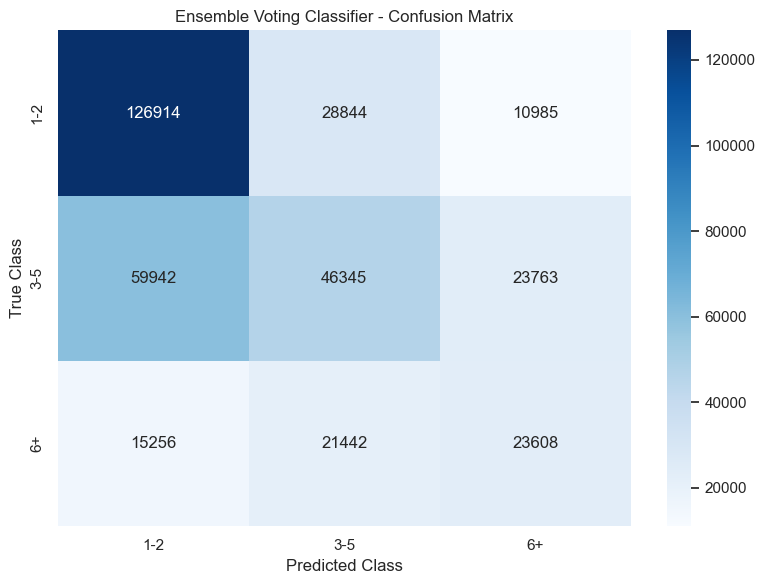

In [46]:
from sklearn.ensemble import VotingClassifier
ensemble_clf = VotingClassifier(
    estimators=[('lr', logreg), ('dt', dtree)],
    voting='hard',
    n_jobs=-1,
)
ensemble_clf.fit(X_train, y_train)
y_pred_ensemble = ensemble_clf.predict(X_test)

print("Ensemble (Voting Classifier) Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_ensemble))
print(classification_report(y_test, y_pred_ensemble))

# ------------------------
# 6. Plot Confusion Matrices for the Ensemble Model
# ------------------------
cm_ensemble = confusion_matrix(y_test, y_pred_ensemble)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_ensemble, annot=True, fmt='d', cmap='Blues',
            xticklabels=logreg.classes_, yticklabels=logreg.classes_)
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Ensemble Voting Classifier - Confusion Matrix')
plt.tight_layout()
plt.show()

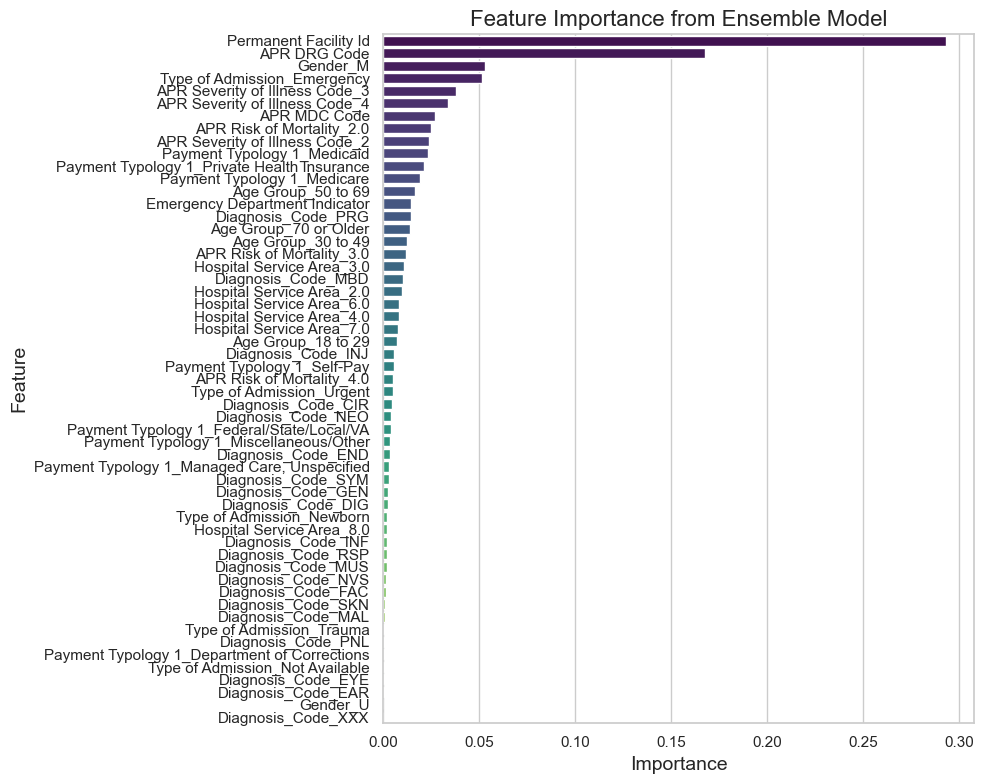

In [47]:
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': dtree.feature_importances_
})

# Sort the DataFrame based on importance.
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Plot using seaborn's barplot.
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')
plt.title('Feature Importance from Ensemble Model', fontsize=16)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.tight_layout()
plt.show()

In [48]:
#TRYING OUT 

In [49]:
bins = [0.5, 1.5, 2.5, 3.5, 4.5,  5.5, np.inf]
labels = ["1", "2", "3", "4", "5", "6+"]

# bins = [0.5, 1.5, 2.5 , 4.5 , np.inf]
# labels = ['1','2','3-4','5+']


# Create a new column 'LOS_class' based on the bins. 
# Setting right=False means intervals are [lower, upper)
data_encoded['LOS_class'] = pd.cut(data['Length of Stay'], bins=bins, labels=labels, right=False)

# Check the distribution of the classes:
print("Length of Stay Class Distribution:")
print(data_encoded['LOS_class'].value_counts())


# Create a new column 'LOS_class' based on the bins. 
# Setting right=False means intervals are [lower, upper)
data_encoded['LOS_class'] = pd.cut(data['Length of Stay'], bins=bins, labels=labels, right=False)

# Check the distribution of the classes:
print("Length of Stay Class Distribution:")
print(data_encoded['LOS_class'].value_counts())

Length of Stay Class Distribution:
LOS_class
2     459467
1     374249
3     309882
6+    301528
4     199316
5     141052
Name: count, dtype: int64
Length of Stay Class Distribution:
LOS_class
2     459467
1     374249
3     309882
6+    301528
4     199316
5     141052
Name: count, dtype: int64


Logistic Regression Performance:
Accuracy: 0.345498027157735
              precision    recall  f1-score   support

           1       0.39      0.52      0.45     74850
           2       0.53      0.35      0.42     91894
           3       0.30      0.12      0.17     61976
           4       0.15      0.13      0.14     39863
           5       0.13      0.17      0.14     28210
          6+       0.36      0.57      0.44     60306

    accuracy                           0.35    357099
   macro avg       0.31      0.31      0.29    357099
weighted avg       0.36      0.35      0.33    357099

Decision Tree Performance:
Accuracy: 0.3291608209488125
              precision    recall  f1-score   support

           1       0.47      0.42      0.45     74850
           2       0.45      0.41      0.43     91894
           3       0.24      0.20      0.22     61976
           4       0.17      0.20      0.18     39863
           5       0.13      0.21      0.16     28210
          6+   

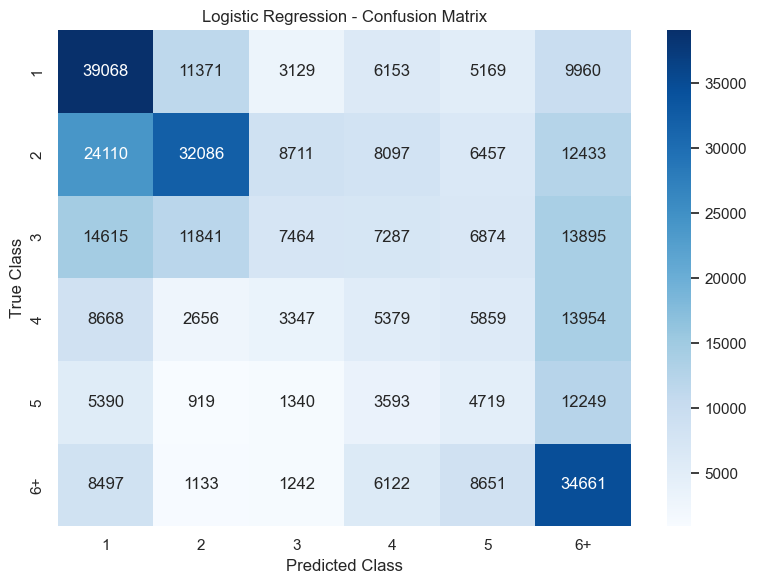

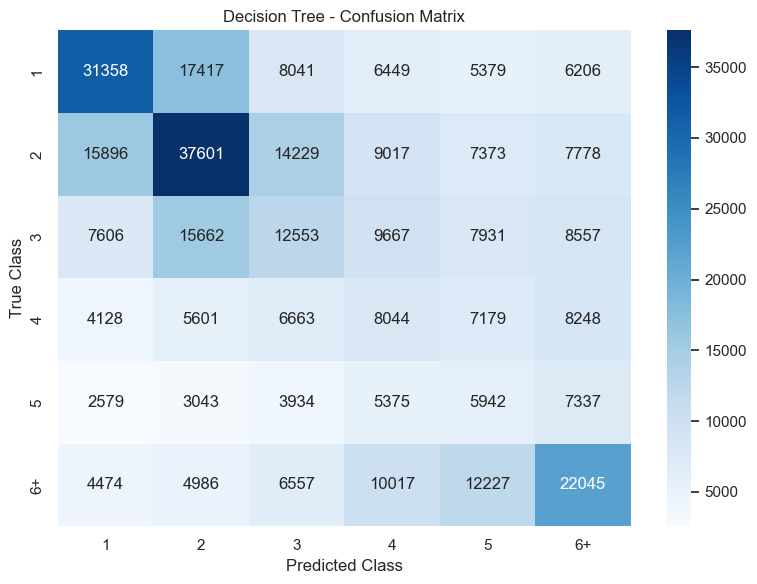

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# ------------------------
# 1. Prepare the Data
# ------------------------
# Assume your processed DataFrame is named 'data_encoded' and it has:
# - A continuous variable 'Length of Stay'

X = data_encoded.drop(columns=['Length of Stay', 'LOS_bin','LOS_class'], errors='ignore')
y = data_encoded['LOS_class']

# ------------------------
# 2. Train/Test Split
# ------------------------
# Stratify to maintain class proportions.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


#Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# ------------------------
# 3. Model 1: Logistic Regression (Multinomial)
# ------------------------
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42, class_weight='balanced')
logreg.fit(X_train_scaled, y_train)
y_pred_logreg = logreg.predict(X_test_scaled)

print("Logistic Regression Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg))

# ------------------------
# 4. Model 2: Decision Tree Classifier
# ------------------------
dtree = DecisionTreeClassifier(random_state=42, class_weight='balanced')
dtree.fit(X_train_scaled, y_train)
y_pred_dtree = dtree.predict(X_test_scaled)

print("Decision Tree Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_dtree))
print(classification_report(y_test, y_pred_dtree))

# # ------------------------
# # 5. Model 3: K-Nearest Neighbors (KNN)
# # ------------------------
# knn = KNeighborsClassifier(n_neighbors=5)
# knn.fit(X_train, y_train)
# y_pred_knn = knn.predict(X_test)

# print("K-Nearest Neighbors Performance:")
# print("Accuracy:", accuracy_score(y_test, y_pred_knn))
# print(classification_report(y_test, y_pred_knn))

# ------------------------
# 6. Plot Confusion Matrices
# ------------------------
models = {
    'Logistic Regression': y_pred_logreg,
    'Decision Tree': y_pred_dtree,
}

for model_name, predictions in models.items():
    cm = confusion_matrix(y_test, predictions)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=logreg.classes_, yticklabels=logreg.classes_)
    plt.xlabel('Predicted Class')
    plt.ylabel('True Class')
    plt.title(f'{model_name} - Confusion Matrix')
    plt.tight_layout()
    plt.show()

In [53]:
#TRYING OUT PCA 

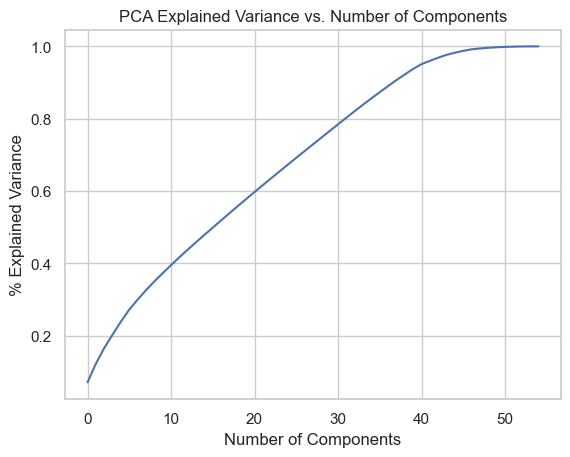

In [54]:
from sklearn.decomposition import PCA
x_train = StandardScaler().fit_transform(X_train)
x_test = StandardScaler().fit_transform(X_test)

pca1 = PCA()
pca1.fit(x_train)
explained_variance_ratio = pca1.explained_variance_ratio_
pc_vs_variance = np.cumsum(pca1.explained_variance_ratio_)
plt.plot(pc_vs_variance)
plt.xlabel('Number of Components')
plt.ylabel('% Explained Variance')
plt.title('PCA Explained Variance vs. Number of Components')
plt.show()

In [55]:
variance_95 = list(filter(lambda i: i > 0.95, pc_vs_variance))[0]
component_95 = pc_vs_variance.tolist().index(variance_95)
print(component_95)

#perform the dimensionality reduction
pca2 = PCA(n_components=component_95)
x_train = pca2.fit_transform(x_train)
x_test = pca2.transform(x_test)

40


In [56]:
pc_df = pd.DataFrame(pca2.components_,columns=X_train.columns)
top_pc = pc_df[0:1]
display(top_pc)

,Permanent Facility Id,APR DRG Code,APR MDC Code,Emergency Department Indicator,Gender_M,Gender_U,Type of Admission_Emergency,Type of Admission_Newborn,Type of Admission_Not Available,Type of Admission_Trauma,...,Diagnosis_Code_MBD,Diagnosis_Code_MUS,Diagnosis_Code_NEO,Diagnosis_Code_NVS,Diagnosis_Code_PNL,Diagnosis_Code_PRG,Diagnosis_Code_RSP,Diagnosis_Code_SKN,Diagnosis_Code_SYM,Diagnosis_Code_XXX
0,-0.022251,-0.312954,-0.31782,0.221111,-0.035746,-0.003652,0.20287,-0.166061,-0.014428,-0.004827,...,-0.287897,-0.011662,0.001362,0.057611,-0.169089,-0.115174,0.104281,0.000498,0.003914,-0.0


In [57]:
new_top_pc = top_pc.abs()
features = []
for i in range(0,10):
  features.append(new_top_pc.idxmax(axis=1).tolist())
  new_top_pc = new_top_pc.drop(columns=features[i])
print(features)

[['Payment Typology 1_Medicare'], ['Age Group_70 or Older'], ['APR MDC Code'], ['APR DRG Code'], ['Diagnosis_Code_MBD'], ['Payment Typology 1_Medicaid'], ['Emergency Department Indicator'], ['Type of Admission_Emergency'], ['Age Group_30 to 49'], ['APR Risk of Mortality_3.0']]


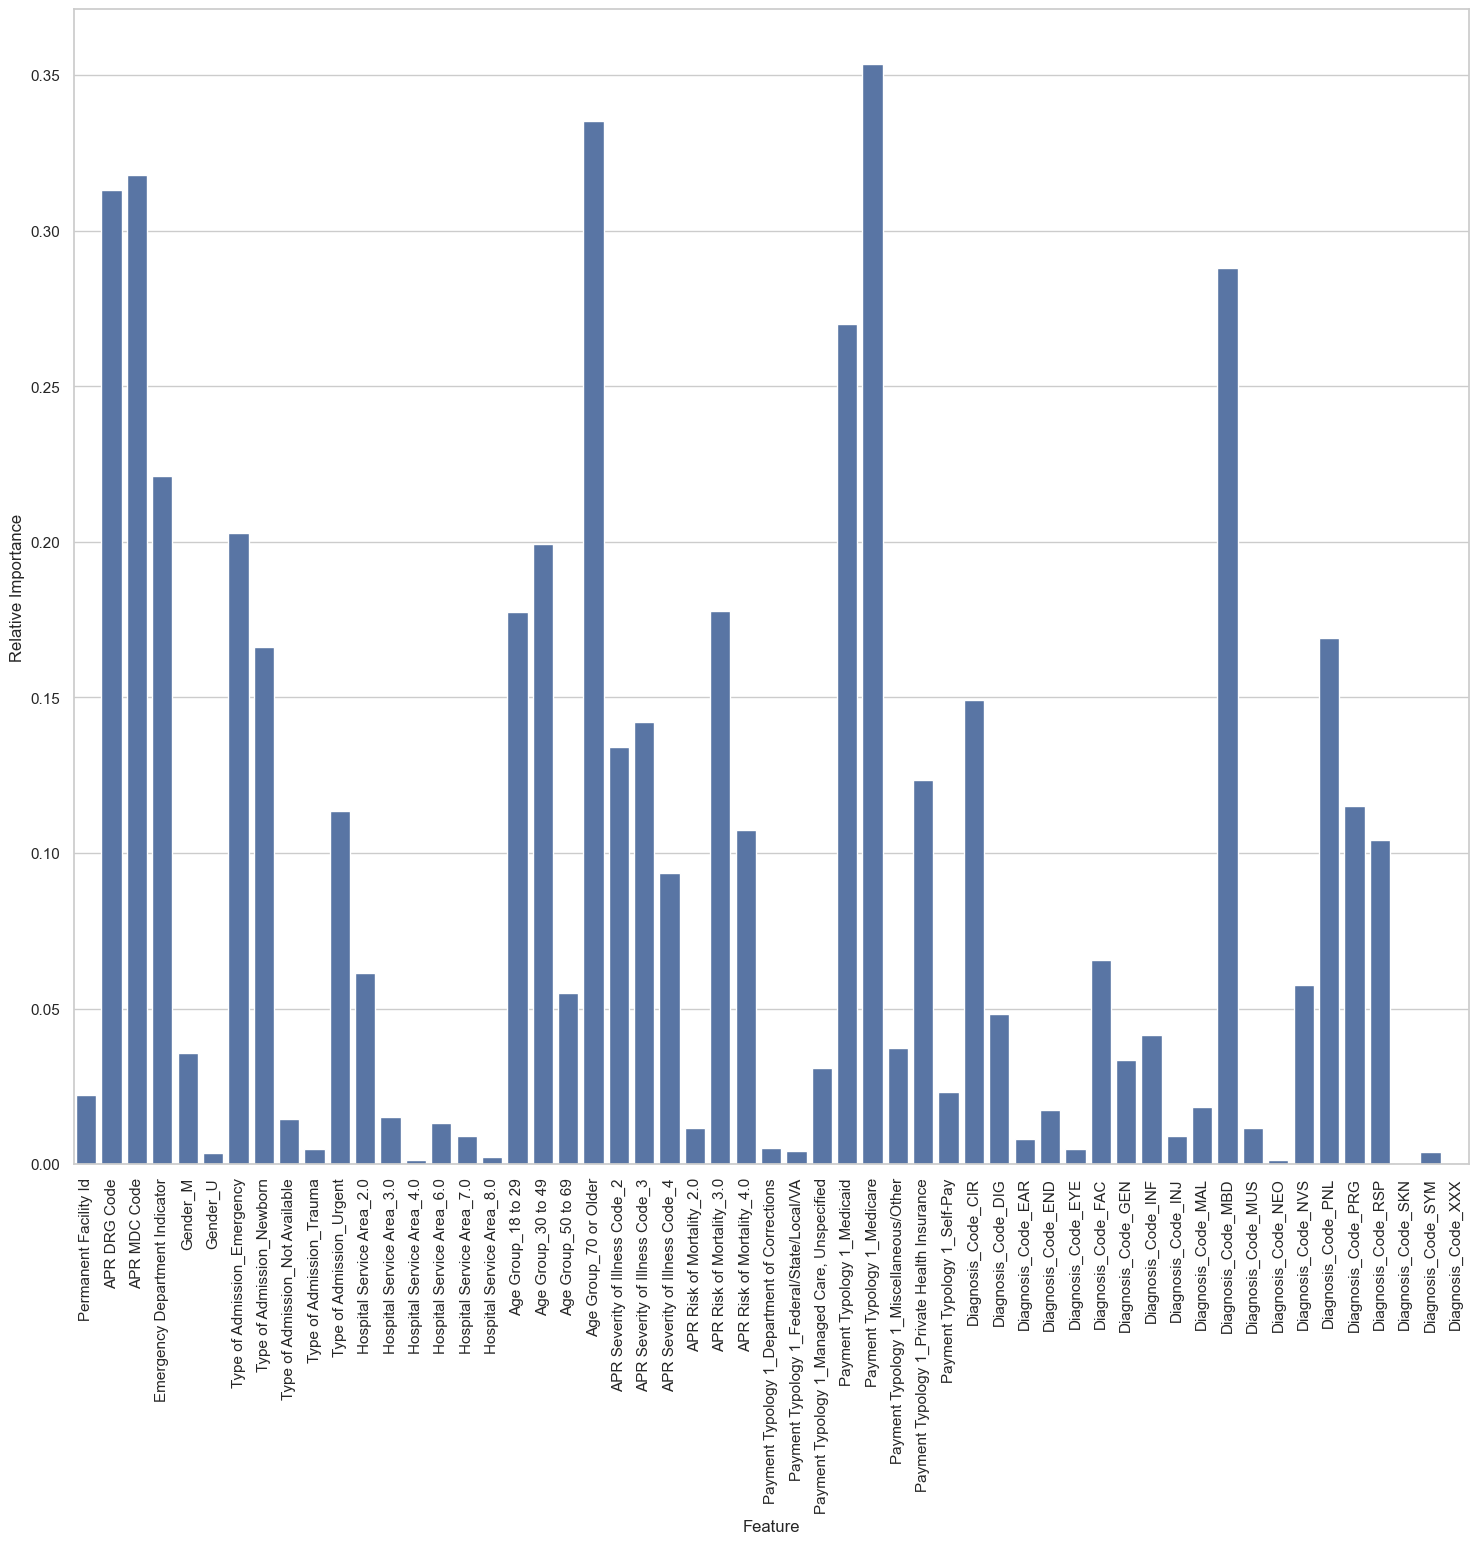

In [58]:
top_pc = top_pc.abs()
list_magnitude = top_pc.loc[0, :].values.tolist()
labels = top_pc.columns.tolist()
feature_importance_df = pd.DataFrame({'Feature': labels, 'Relative Importance': list_magnitude})
#feature_importance_df = feature_importance_df.nlargest(10, 'Relative Importance')

fig, ax =plt.subplots(figsize=(18,15))
sns.barplot(x='Feature', y='Relative Importance', data=feature_importance_df.reset_index())
plt.xticks(rotation=90)
plt.show()

In [59]:
# Check absolute count
print("Absolute counts of each class:")
print(data_encoded['LOS_class'].value_counts())

# Check relative frequencies (proportions)
print("\nProportions of each class:")
print(data_encoded['LOS_class'].value_counts(normalize=True))

Absolute counts of each class:
LOS_class
2     459467
1     374249
3     309882
6+    301528
4     199316
5     141052
Name: count, dtype: int64

Proportions of each class:
LOS_class
2     0.257333
1     0.209605
3     0.173555
6+    0.168877
4     0.111631
5     0.078999
Name: proportion, dtype: float64


In [60]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# 1) Split into train & test (stratify if you have classes)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

# 2) Instantiate PCA and fit _only_ on the training data
pca = PCA(n_components=30, random_state=42)
pca.fit(X_train)

# 3) Transform both train and test using the _trained_ PCA
X_train_pca = pca.transform(X_train)
X_test_pca  = pca.transform(X_test)

# 4) Train your classifier on the reduced train set
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_pca, y_train)

# 5) Evaluate on the held-out PCA-transformed test set
y_pred = clf.predict(X_test_pca)
print("Test accuracy:", accuracy_score(y_test, y_pred))


Test accuracy: 1.0


In [61]:
# how many examples per LOS bin?
print(data_encoded['LOS_code'].value_counts())

# if you see something like:
# 1    100
# 2      5
# 0    200
# that “2” only has 5 samples—too few for a 30% test split.


LOS_code
2.0    301528
Name: count, dtype: int64


In [62]:
import numpy as np
from sklearn.model_selection import train_test_split

# Assume df contains your encoded data with 'LOS_code' as the target
X = df.drop(columns=['Length of Stay','LOS_class','LOS_code'])
y = df['LOS_code']

# 1a) Look at how many classes you have and their counts
print("Overall label counts:\n", y.value_counts())

# 1b) Split (with stratify) and inspect each side
X_tr, X_te, y_tr, y_te = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)
print("Train label counts:", np.bincount(y_tr))
print("Test  label counts:", np.bincount(y_te))


Overall label counts:
 LOS_code
2.0    301528
Name: count, dtype: int64
Train label counts: [     0      0 211069]
Test  label counts: [    0     0 90459]


In [63]:
len(data_encoded)

1785494

In [64]:
data_encoded['Length of Stay'].value_counts()

Length of Stay
2    459467
1    374249
3    309882
4    199316
5    141052
6    105530
7     83655
8     63524
9     48819
Name: count, dtype: int64

In [65]:
bins = [0.5, 3.5, 7.5, np.inf]
labels = ["1-3","4-7", "7+"]



# Create a new column 'LOS_class' based on the bins. 
# Setting right=False means intervals are [lower, upper)
data_encoded['LOS_class'] = pd.cut(data['Length of Stay'], bins=bins, labels=labels, right=False)

# Check the distribution of the classes:
print("Length of Stay Class Distribution:")
print(data_encoded['LOS_class'].value_counts())

Length of Stay Class Distribution:
LOS_class
1-3    1143598
4-7     529553
7+      112343
Name: count, dtype: int64


In [66]:
data_encoded.isnull().sum()

Permanent Facility Id                                 0
Length of Stay                                        0
APR DRG Code                                          0
APR MDC Code                                          0
Emergency Department Indicator                        0
Gender_M                                              0
Gender_U                                              0
Type of Admission_Emergency                           0
Type of Admission_Newborn                             0
Type of Admission_Not Available                       0
Type of Admission_Trauma                              0
Type of Admission_Urgent                              0
Hospital Service Area_2.0                             0
Hospital Service Area_3.0                             0
Hospital Service Area_4.0                             0
Hospital Service Area_6.0                             0
Hospital Service Area_7.0                             0
Hospital Service Area_8.0                       

Logistic Regression Recall:
Recall: 0.5450729349564126
  Recall by Class: [0.65120234 0.2972779  0.6327666 ]
Decision Tree Recall:
  Recall: 0.5998812654193935
  Recall by Class: [0.69380465 0.45843208 0.31053053]


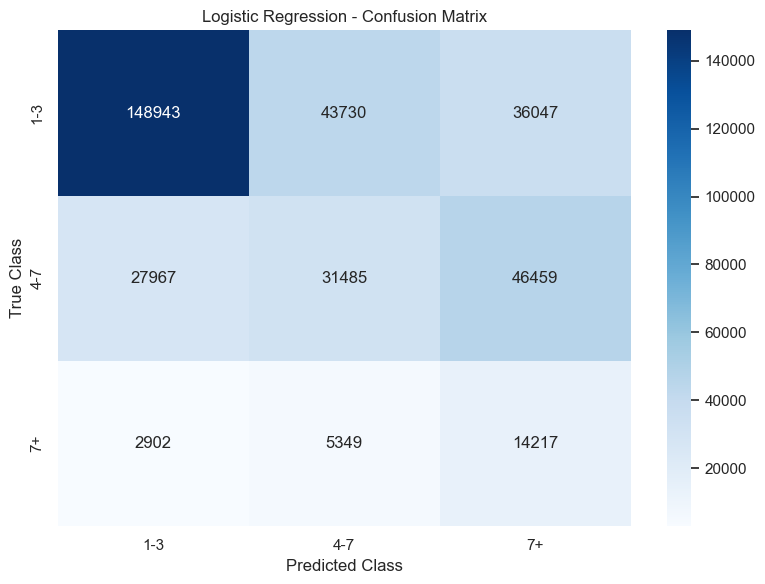

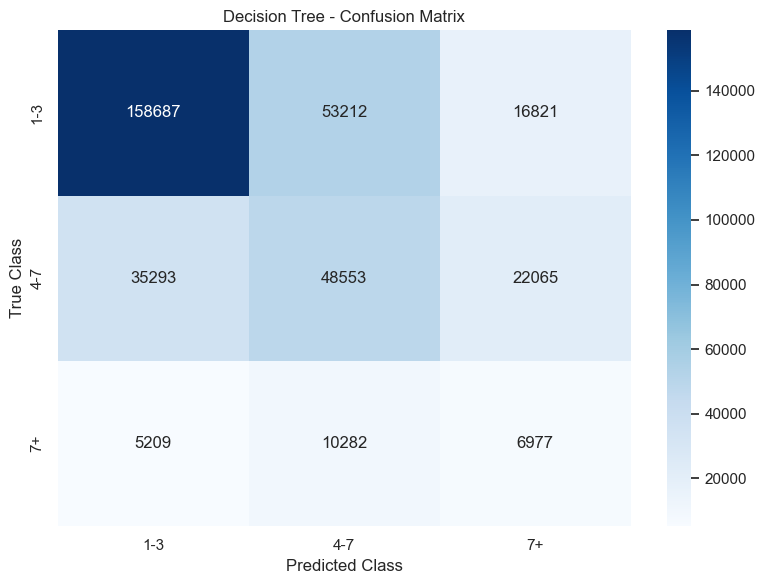

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# ------------------------
# 1. Prepare the Data
# ------------------------
# Assume your processed DataFrame is named 'data_encoded' and it has:
# - A continuous variable 'Length of Stay'

X = data_encoded.drop(columns=['Length of Stay', 'LOS_bin','LOS_class','LOS_code'], errors='ignore')
y = data_encoded['LOS_class']

# ------------------------
# 2. Train/Test Split
# ------------------------
# Stratify to maintain class proportions.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


#Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# ------------------------
# 3. Model 1: Logistic Regression (Multinomial)
# ------------------------
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42, class_weight='balanced')
logreg.fit(X_train_scaled, y_train)
y_pred_logreg = logreg.predict(X_test_scaled)


# ------------------------
# 4. Model 2: Decision Tree Classifier
# ------------------------
dtree = DecisionTreeClassifier(random_state=42, class_weight='balanced')
dtree.fit(X_train_scaled, y_train)
y_pred_dtree = dtree.predict(X_test_scaled)


from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, recall_score


# ------------------------
# 3a. Recall for Logistic Regression
# ------------------------
print("Logistic Regression Recall:")
# Macro‐averaged recall across classes
print("Recall:", recall_score(y_test, y_pred_logreg, average='weighted'))
# Recall per class (in the order of logreg.classes_)
print("  Recall by Class:", recall_score(y_test, y_pred_logreg, average=None))

# ------------------------
# 4a. Recall for Decision Tree
# ------------------------
print("Decision Tree Recall:")
print("  Recall:", recall_score(y_test, y_pred_dtree, average='weighted'))
print("  Recall by Class:", recall_score(y_test, y_pred_dtree, average=None))


# # ------------------------
# # 5. Model 3: K-Nearest Neighbors (KNN)
# # ------------------------
# knn = KNeighborsClassifier(n_neighbors=5)
# knn.fit(X_train, y_train)
# y_pred_knn = knn.predict(X_test)

# print("K-Nearest Neighbors Performance:")
# print("Accuracy:", accuracy_score(y_test, y_pred_knn))
# print(classification_report(y_test, y_pred_knn))

# ------------------------
# 6. Plot Confusion Matrices
# ------------------------
models = {
    'Logistic Regression': y_pred_logreg,
    'Decision Tree': y_pred_dtree,
}

for model_name, predictions in models.items():
    cm = confusion_matrix(y_test, predictions)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=logreg.classes_, yticklabels=logreg.classes_)
    plt.xlabel('Predicted Class')
    plt.ylabel('True Class')
    plt.title(f'{model_name} - Confusion Matrix')
    plt.tight_layout()
    plt.show()

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best CV recall: 0.603

Tuned Decision Tree Recall on Test Set:
  Recall: 0.600
  Recall by Class: [0.6942681  0.45762952 0.31315649]

              precision    recall  f1-score   support

         1-3       0.80      0.69      0.74    228720
         4-7       0.43      0.46      0.45    105911
          7+       0.15      0.31      0.21     22468

    accuracy                           0.60    357099
   macro avg       0.46      0.49      0.46    357099
weighted avg       0.65      0.60      0.62    357099



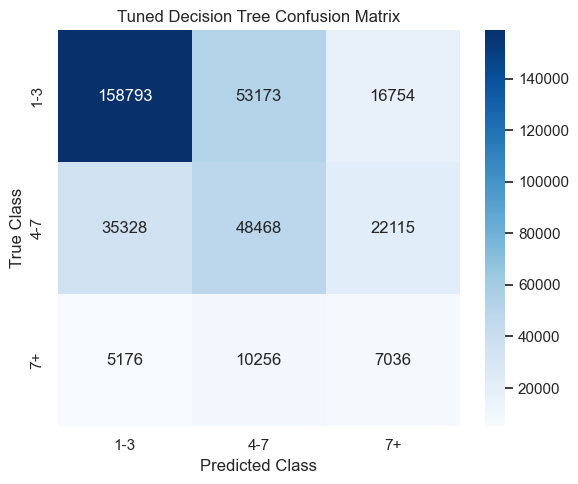

In [77]:
from sklearn.metrics import accuracy_score, recall_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# ------------------------
# 5. Decision Tree + GridSearch (optimize for recall)
# ------------------------
base_dtree = DecisionTreeClassifier(random_state=42, class_weight='balanced')

param_grid = {
    'max_depth':        [None, 3, 5],
    'min_samples_split':[2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion':        ['gini', 'entropy']
}

# change scoring from 'accuracy' to 'recall_macro'
grid_search = GridSearchCV(
    estimator=base_dtree,
    param_grid=param_grid,
    cv=5,
    scoring='recall_weighted',   # ← optimize for macro recall
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train_scaled, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best CV recall: {:.3f}".format(grid_search.best_score_))

# Grab the tuned estimator
best_dtree = grid_search.best_estimator_

# ------------------------
# Evaluate on the test set (recall‐focused)
# ------------------------
y_pred_gs = best_dtree.predict(X_test_scaled)

# recall on test
macro_recall = recall_score(y_test, y_pred_gs, average='weighted')
# Recall per class
class_recall = recall_score(y_test, y_pred_gs, average=None)

print("\nTuned Decision Tree Recall on Test Set:")
print(f"  Recall: {macro_recall:.3f}")
print(f"  Recall by Class: {class_recall}")

# You can still view the full classification report (which includes precision, recall, f1):
print("\n" + classification_report(y_test, y_pred_gs, target_names=logreg.classes_))

# Plot its confusion matrix
cm = confusion_matrix(y_test, y_pred_gs)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=logreg.classes_, yticklabels=logreg.classes_)
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Tuned Decision Tree Confusion Matrix')
plt.tight_layout()
plt.show()

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Ensemble (Voting Classifier) Performance:
              precision    recall  f1-score   support

         1-3       0.77      0.80      0.78    228720
         4-7       0.47      0.40      0.43    105911
          7+       0.18      0.24      0.21     22468

    accuracy                           0.64    357099
   macro avg       0.47      0.48      0.47    357099
weighted avg       0.64      0.64      0.64    357099


 Voting Classifier Recall on Test Set:
  Recall: 0.600


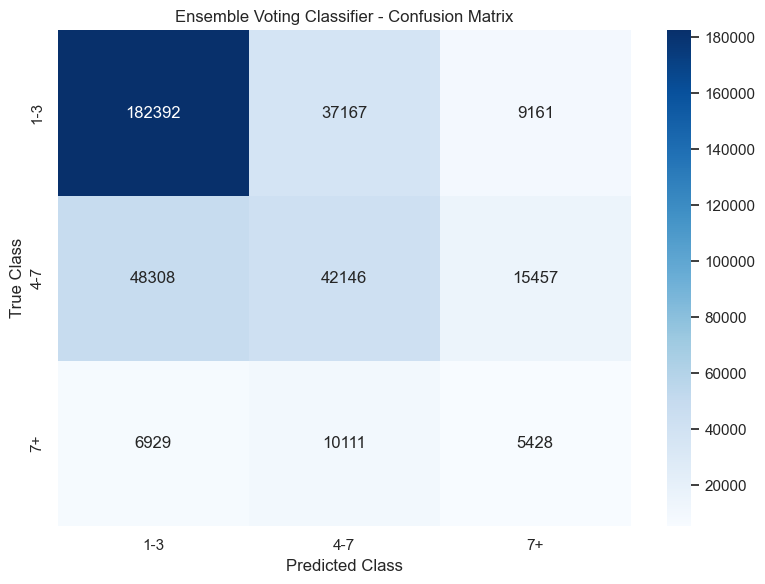

In [78]:
from sklearn.ensemble import VotingClassifier
ensemble_clf = VotingClassifier(
    estimators=[('lr', logreg), ('dt', dtree)],
    voting='hard',
    n_jobs=-1,
)
ensemble_clf.fit(X_train, y_train)
y_pred_ensemble = ensemble_clf.predict(X_test)

print("Ensemble (Voting Classifier) Performance:")

print(classification_report(y_test, y_pred_ensemble))
# recall on test
recall = recall_score(y_test, y_pred_ensemble, average='weighted')
print("\n Voting Classifier Recall on Test Set:")
print(f"  Recall: {macro_recall:.3f}")

# ------------------------
# 6. Plot Confusion Matrices for the Ensemble Model
# ------------------------
cm_ensemble = confusion_matrix(y_test, y_pred_ensemble)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_ensemble, annot=True, fmt='d', cmap='Blues',
            xticklabels=logreg.classes_, yticklabels=logreg.classes_)
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Ensemble Voting Classifier - Confusion Matrix')
plt.tight_layout()
plt.show()

In [70]:
!pip install xgboost

/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [15:47:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [15:47:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [15:47:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [15:47:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i

5-fold CV weighted recall: 0.703 ± 0.001


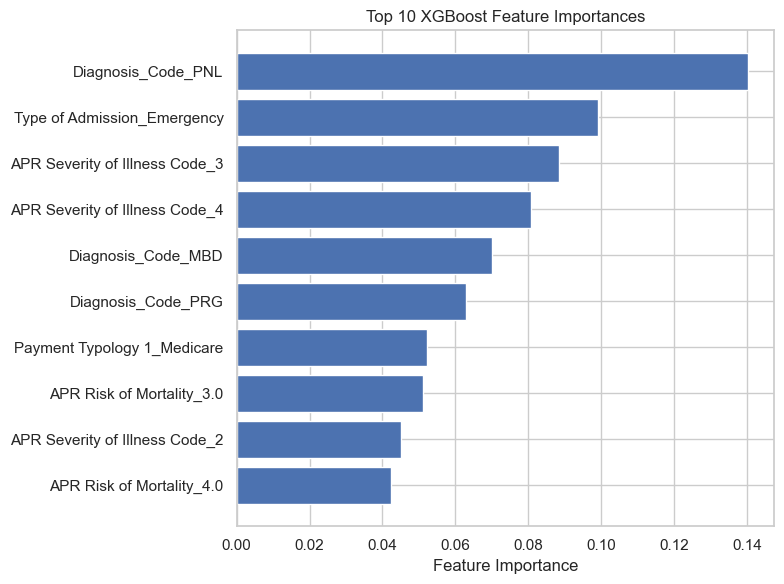

In [83]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import recall_score
import matplotlib.pyplot as plt
import numpy as np

# 0) Encode your string‐labels into ints
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc  = le.transform(y_test)
# Now le.classes_ == array(['1-3','4-7','7+'], dtype=object)

# 1) Initialize XGBClassifier
xgb_clf = xgb.XGBClassifier(
    objective='multi:softprob',
    eval_metric='mlogloss',
    use_label_encoder=False,
    random_state=42
)

# 2) 5-fold stratified CV on the training data (scoring by weighted recall)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(
    xgb_clf,
    X_train_scaled,
    y_train_enc,
    cv=cv,
    scoring='recall_weighted',
    n_jobs=-1
)
print(f"5-fold CV weighted recall: {np.mean(cv_scores):.3f} ± {np.std(cv_scores):.3f}")

# 3) Final fit on full training set
xgb_clf.fit(X_train_scaled, y_train_enc)



XGBoost Confusion Matrix:
 [[198229  30411     80]
 [ 53696  51958    257]
 [  6844  15335    289]]

Classification Report:
               precision    recall  f1-score   support

         1-3       0.77      0.87      0.81    228720
         4-7       0.53      0.49      0.51    105911
          7+       0.46      0.01      0.03     22468

    accuracy                           0.70    357099
   macro avg       0.59      0.46      0.45    357099
weighted avg       0.68      0.70      0.67    357099



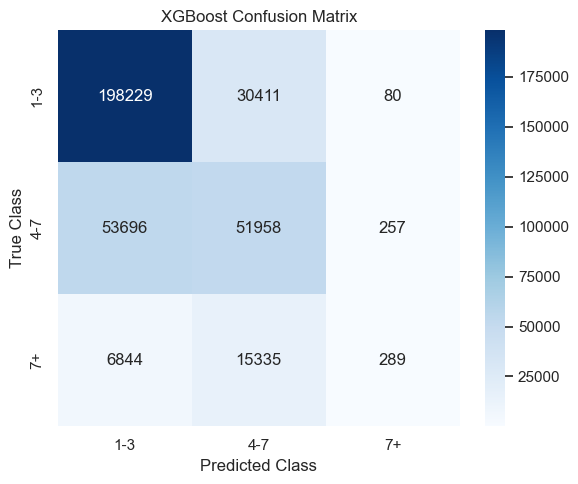

In [84]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# 4) Predict on the test set
y_pred_xgb = xgb_clf.predict(X_test_scaled)

# 5) Compute confusion matrix (using encoded labels)
cm = confusion_matrix(y_test_enc, y_pred_xgb)

# 6) Print numeric matrix and full report
print("XGBoost Confusion Matrix:\n", cm)
print("\nClassification Report:\n",
      classification_report(y_test_enc, y_pred_xgb, target_names=le.classes_))

# 7) Plot as heatmap
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('XGBoost Confusion Matrix')
plt.tight_layout()
plt.show()


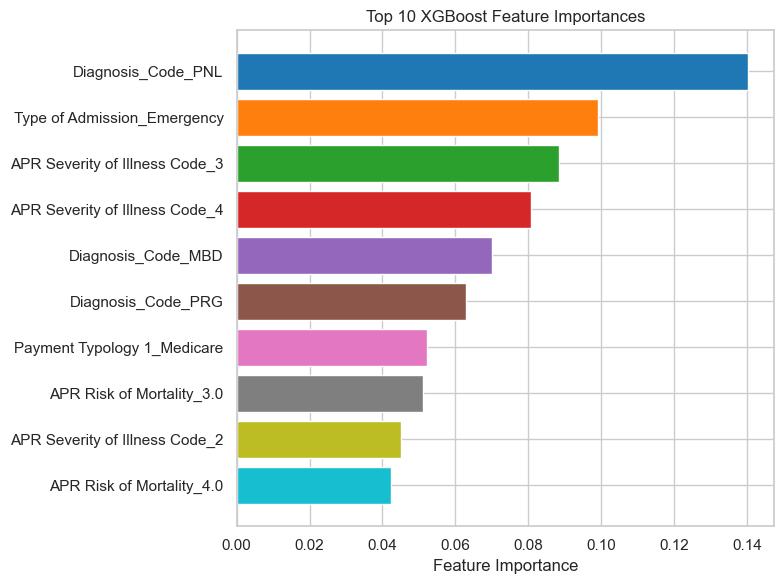

In [86]:
import matplotlib.pyplot as plt
import numpy as np

# assume importances, feature_names, idxs as before

# pick top-10 indices
top_idxs = idxs

# generate 10 distinct colors from a colormap
colors = plt.cm.tab10(np.linspace(0, 1, len(top_idxs)))

plt.figure(figsize=(8,6))
plt.barh(
    feature_names[top_idxs],
    importances[top_idxs],
    color=colors
)
plt.gca().invert_yaxis()
plt.xlabel("Feature Importance")
plt.title("Top 10 XGBoost Feature Importances")
plt.tight_layout()
plt.show()
